In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
print(f'numpy : {np.__version__}')
print(f'pandas : {np.__version__}')
print(f'seaborn : {np.__version__}')
print(f'matplotlib : {np.__version__}')

numpy : 1.18.5
pandas : 1.18.5
seaborn : 1.18.5
matplotlib : 1.18.5


Setting up Matplotlib for clean visualisation

In [3]:
plt.rc('font', size=12)  #controls default text sizes
plt.rc('axes', titlesize=14)  #fontsize of axes title
plt.rc('axes', labelsize=12)  #fontsize of x and y labels
plt.rc('xtick', labelsize=12)  #fontsize of the tick labels
plt.rc('ytick', labelsize=12)  #fontsize of the tick labels
plt.rc('legend', fontsize=12)  #legend fontsize
plt.rc('figure', titlesize=14)  #fontsize of the figure title
plt.rcParams['figure.dpi'] = 300 #high resolution
sns.set_style('whitegrid')

In [4]:
data = pd.read_csv('C:/Users/garim/Desktop/Netflix/netflix_titles.csv')

In [5]:
print(data.shape)

(7787, 12)


Counting how many values are missing

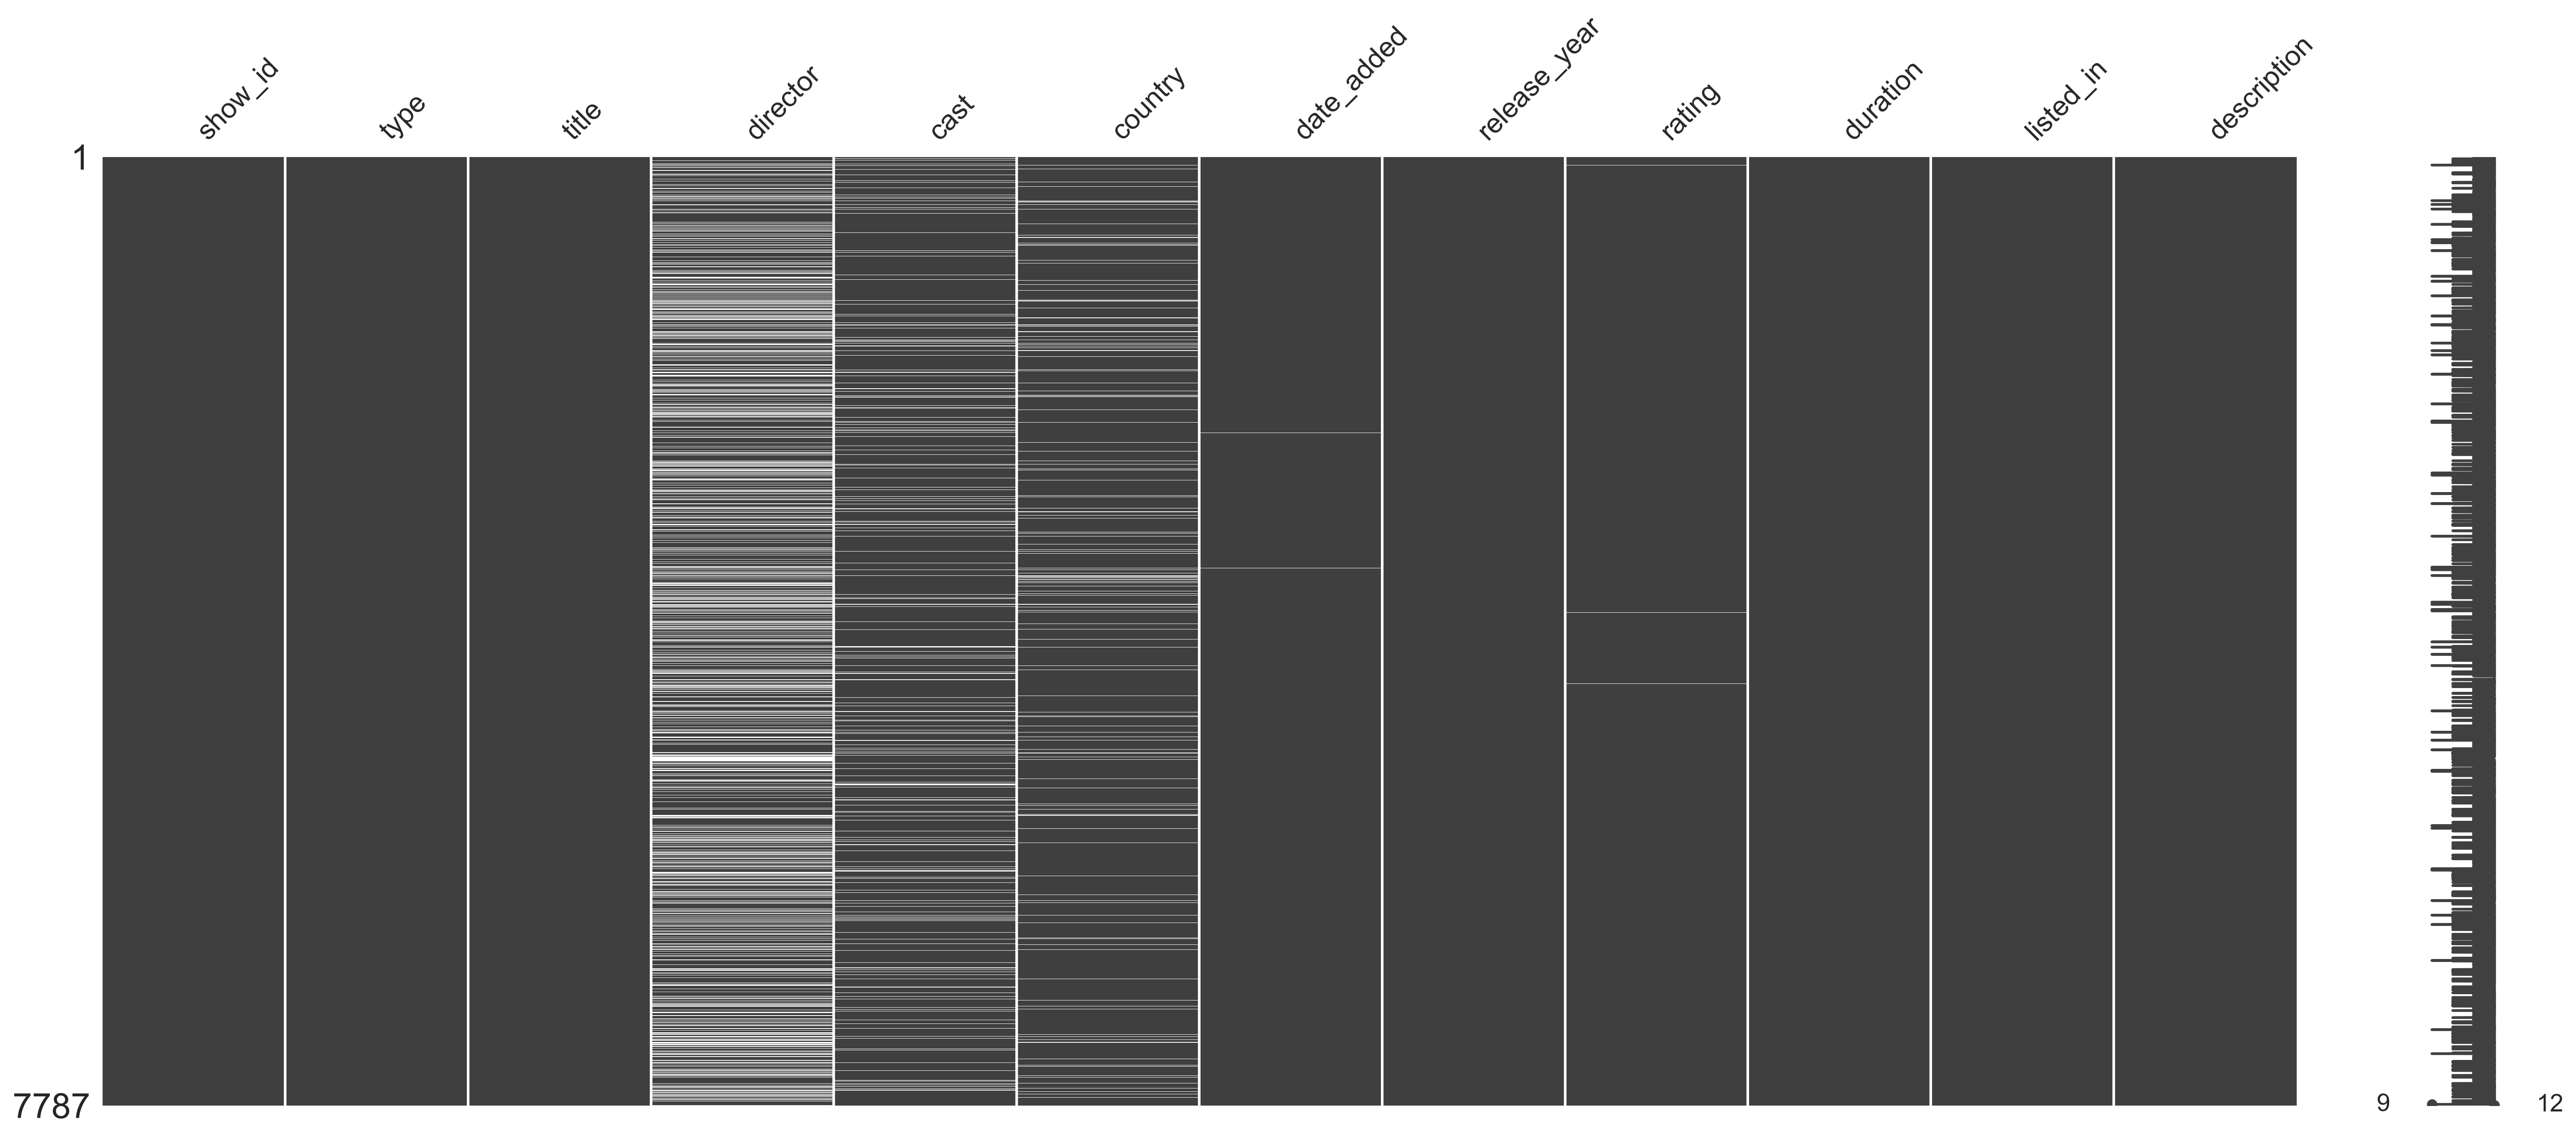

In [6]:
msno.matrix(data)
plt.show()

It can be seen that director, cast, and country have the most missing values.

In [7]:
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
data.describe(include='all') #check unique count & frequency

show_id   type            title                director  \
count     7787   7787             7787                    5398   
unique    7787      2             7787                    4049   
top      s5513  Movie  The Five Venoms  Raúl Campos, Jan Suter   
freq         1   5377                1                      18   
mean       NaN    NaN              NaN                     NaN   
std        NaN    NaN              NaN                     NaN   
min        NaN    NaN              NaN                     NaN   
25%        NaN    NaN              NaN                     NaN   
50%        NaN    NaN              NaN                     NaN   
75%        NaN    NaN              NaN                     NaN   
max        NaN    NaN              NaN                     NaN   

                      cast        country       date_added  release_year  \
count                 7069           7280             7777   7787.000000   
unique                6831            681             1565           NaN   
top     David Attenborough  United States  January 1, 2020           NaN   
freq                    18           2555              118           NaN   
mean                   NaN            NaN              NaN   2013.932580   
std                    NaN            NaN              NaN      8.757395   
min                    NaN            NaN              NaN   1925.000000   
25%                    NaN            NaN              NaN   2013.000000   
50%                    NaN            NaN              NaN   2017.000000   
75%                    NaN            NaN              NaN   2018.000000   
max                    NaN            NaN              NaN   2021.000000   

       rating  duration      listed_in  \
count    7780      7787           7787   
unique     14       216            492   
top     TV-MA  1 Season  Documentaries   
freq     2863      1608            334   
mean      NaN       NaN            NaN   
std       NaN       NaN            NaN   
min       NaN       NaN            NaN   
25%       NaN       NaN            NaN   
50%       NaN       NaN            NaN   
75%       NaN       NaN            NaN   
max       NaN       NaN            NaN   

                                              description  
count                                                7787  
unique                                               7769  
top     A surly septuagenarian gets another chance at ...  
freq                                                    3  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [10]:
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

There doesn't appear to be anything visual in the show id and description.

In [11]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
#finding the % of null values

for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100
    if null_rate > 0:
        print(f"{i}'s null rate : {null_rate}%")

director's null rate : 30.679337357133683%
cast's null rate : 9.220495697958135%
country's null rate : 6.51085141903172%
date_added's null rate : 0.1284191601386927%
rating's null rate : 0.08989341209708489%


There are 5837 videos, each with 12 features (director, cast, and nation), all of which have a lot of null data.

-- director: It appears that only the director who has taken the most work can visualise it individually.
-- Cast: When converted to a number of persons, cast can be assumed to be zero.
-- Country: The country appears to be categorised as none as well..

In [13]:
# handling the missing values
# by first separating the date and then taking the year with the Lamda split function
data = data.fillna('NULL')
data['year_added'] = data['date_added'].apply(lambda x : x.split(',')[-1])
data['year_added'] = data['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
data['year_added'] = data['year_added'].apply(int)

In [14]:
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%               NULL   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  
0  In a future where the elite inhabit an island ...        2020  
1  After a devastating earthquake hits Mexico Cit...        2016  
2  When an army recruit is found dead, his fellow...        2018  
3  In a postapocalyptic world, rag-doll robots hi...        2017  
4  A brilliant group of students become card-coun...        2020

In [3]:
movie = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

NameError: name 'data' is not defined

In [16]:
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%               NULL   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  
0  In a future where the elite inhabit an island ...        2020  
1  After a devastating earthquake hits Mexico Cit...        2016  
2  When an army recruit is found dead, his fellow...        2018  
3  In a postapocalyptic world, rag-doll robots hi...        2017  
4  A brilliant group of students become card-coun...        2020

Why is Netflix the largest provider of video content? Let's look at how it developed.

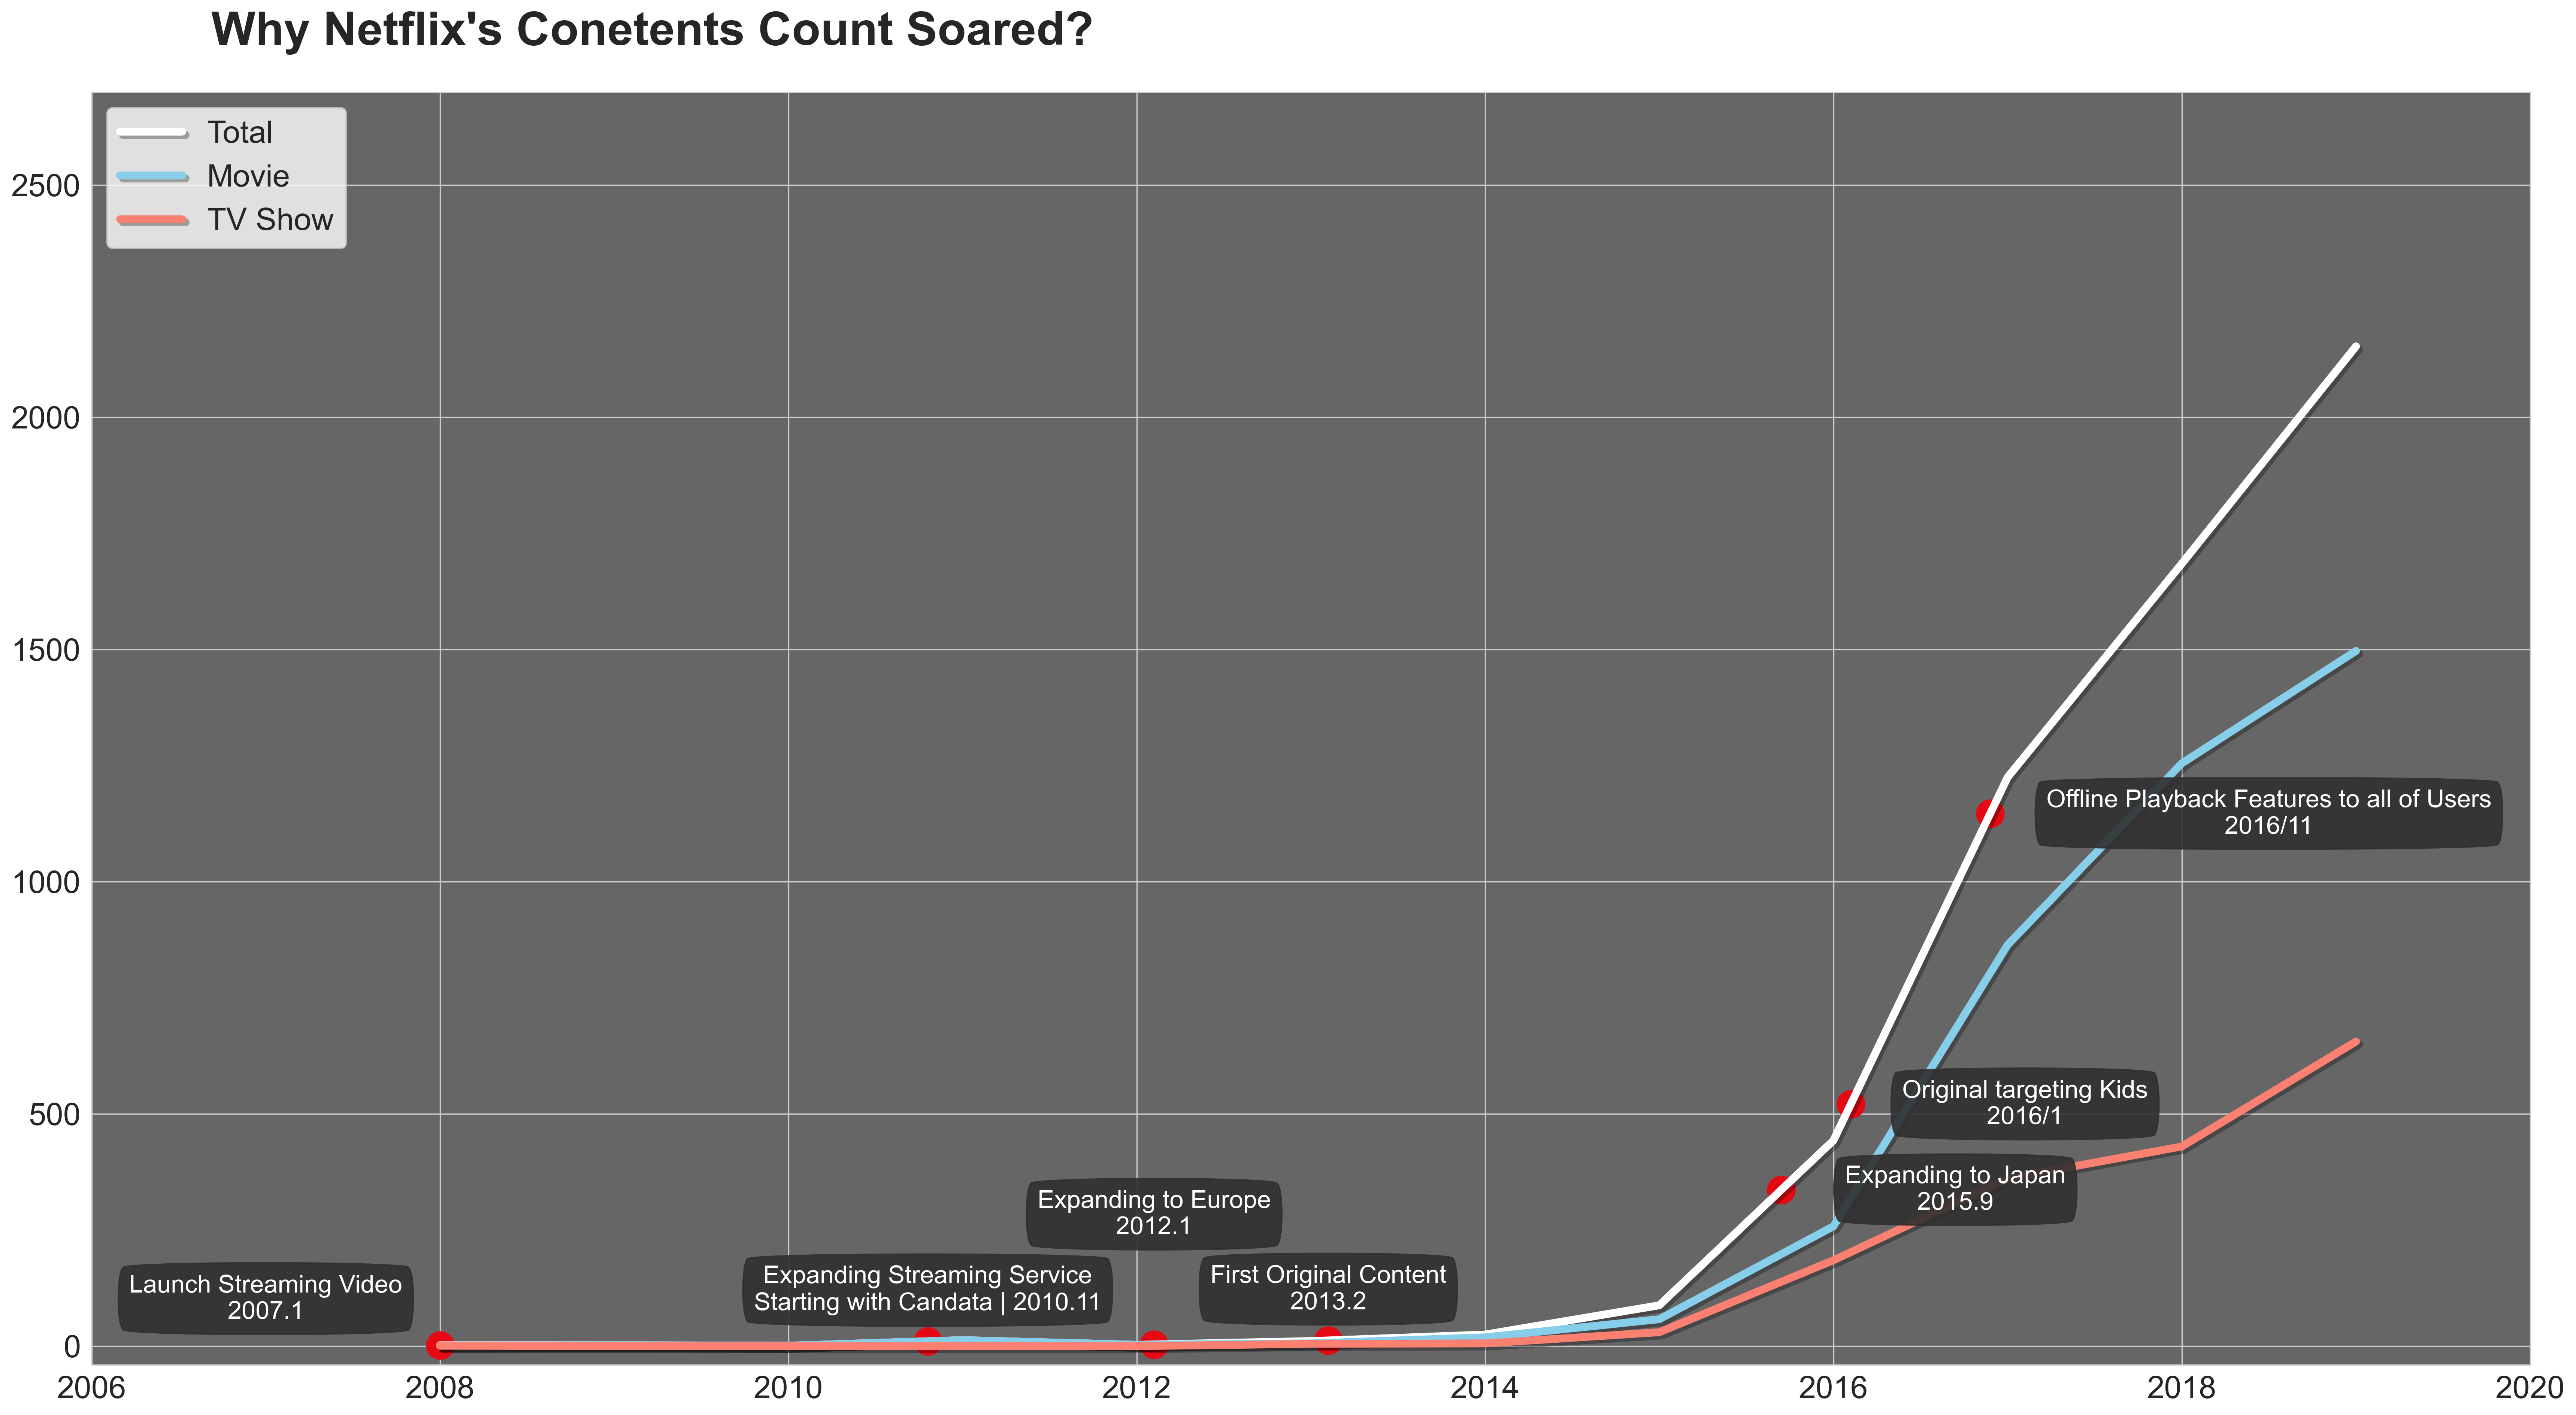

In [17]:
import matplotlib.patheffects as path_effects
year_data = data['year_added'].value_counts().sort_index().loc[:2019]
type_data = data.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.loc[:2019] 

fig, ax = plt.subplots(1,1, figsize=(28, 15))
ax.plot(year_data.index, year_data,  color="white", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='skyblue', linewidth=5, label='Movie', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['TV Show'], color='salmon', linewidth=5, label='TV Show', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

t = [
    2008,
    2010.8,
    2012.1,
    2013.1,
    2015.7,
    2016.1,
    2016.9
]

events = [
    "Launch Streaming Video\n2007.1",
    "Expanding Streaming Service\nStarting with Candata | 2010.11",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11"
]

up_down = [100, 110, 280, 110, 0, 0, 0]

left_right = [ -1, 0, 0, 0, 1, 1, 1.6 ]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(event_i,
                xy=(t_i + lr_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)) + ud_i),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=16,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))
    
    # A proportional expression to draw the middle of the year
    ax.scatter(t_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)), color='#E50914', s=300)

ax.set_facecolor((0.4, 0.4, 0.4))
ax.set_title("Why Netflix's Conetents Count Soared?", position=(0.23, 1.0+0.03), fontsize=30, fontweight='bold')
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.legend(loc='upper left', fontsize=20)

plt.show()

In [18]:
##data.to_csv (r'C:\Users\garim\Desktop\Netflix\netflix_new.csv', index = False, header=True)

Which country is the most prolific in terms of content creation?

In [19]:
from collections import Counter
country_data = data['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
country_count.drop(['NULL'], axis=0, inplace=True)

Let's see how many countries there are in total.

In [20]:
##data.to_csv (r'C:\Users\garim\Desktop\Netflix\new_data.csv', index = False, header=True)

In [21]:
total = sum(country_count)
top20 = sum(country_count[:20])
print(f'total : {total}')
print(f'top 20 countries : {top20}')
print(f'percentage : {top20}/{total} = {100*top20/total}')

total : 9067
top 20 countries : 7879
percentage : 7879/9067 = 86.8975405315981


In [22]:
top20_country = country_count[:20]

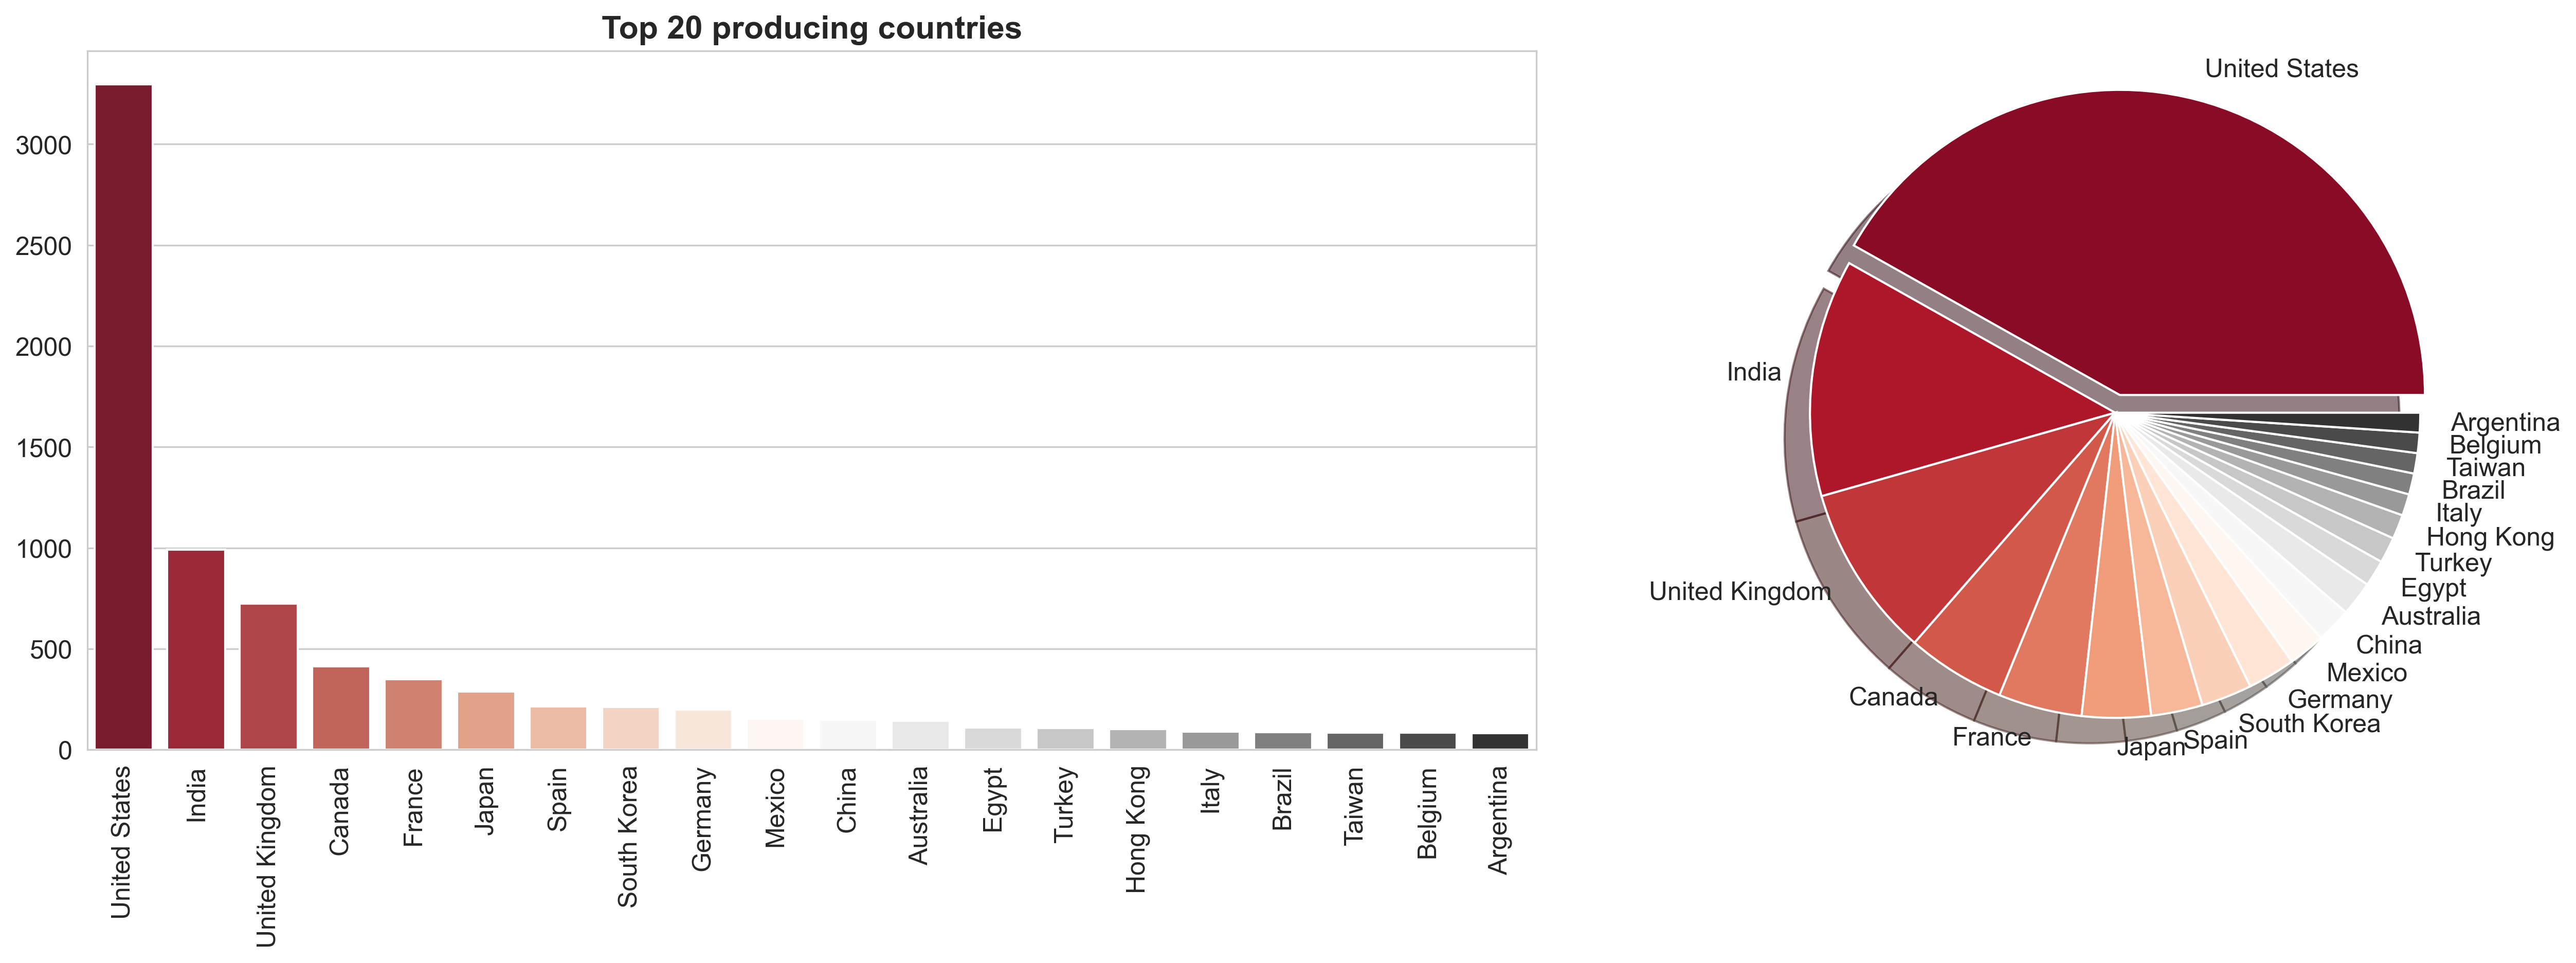

In [23]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top20_country.index, top20_country, ax=ax, palette="RdGy")
ax.set_xticklabels(top20_country.index, rotation='90')
ax.set_title('Top 20 producing countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(20)]
explode[0] = 0.06

ax2 = plt.subplot(gs[1])
ax2.pie(top20_country, labels=top20_country.index,
        shadow=True, startangle=0, explode=explode,
        colors=sns.color_palette("RdGy", n_colors=20)
       )
ax2.axis('equal') 

plt.show()

The United States clearly makes up 40% of the global total.

TreeMaps can be used to better visualise structural data and to make bigger comparisons.

In [24]:
##pip install squarify
import squarify

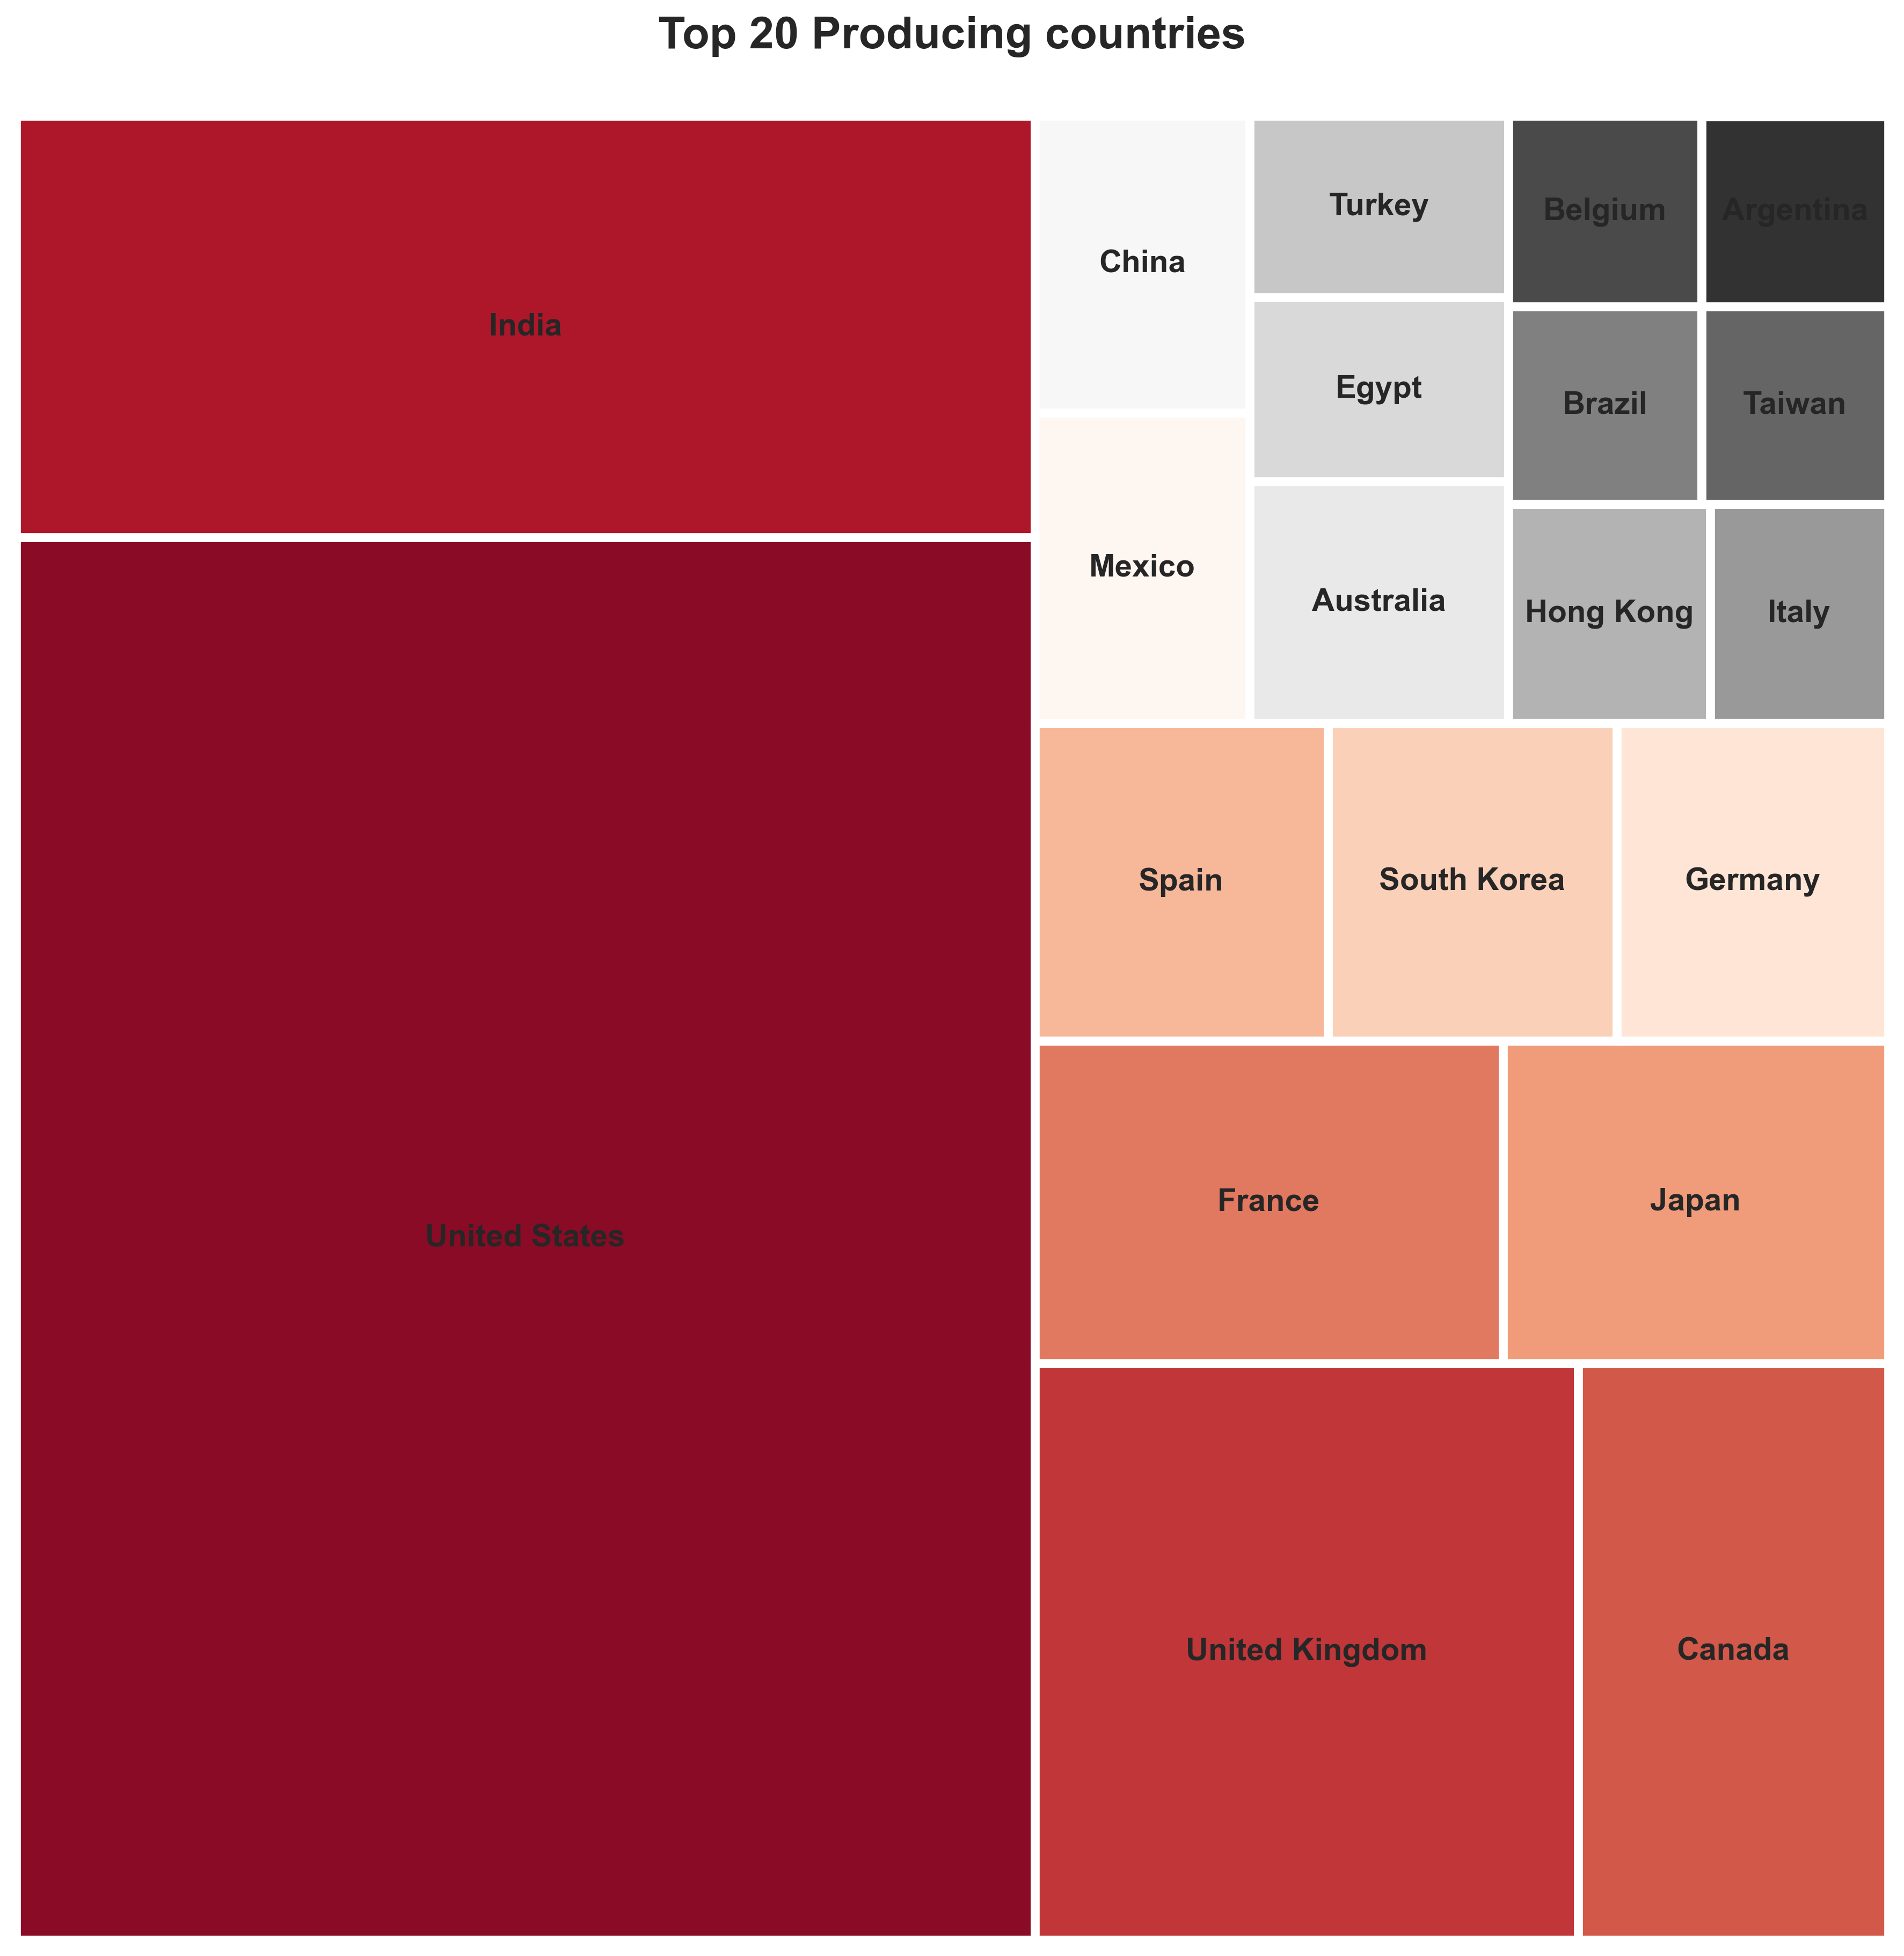

In [25]:
y = top20_country
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("RdGy", n_colors=20), linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 20 Producing countries', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

The United States is at the top of the list, accounting for 40% of the top 20 nations. As it swept across Canada, Canada was at the top of the list.
China is likely to be banned or developing their own app,
To make something similar to a mosaic graph, I am trying to construct a waffle chart. thus to achieve a more useful graph, I am trying to draw a round graph of country population.

In [26]:
!pip install pywaffle
from pywaffle import Waffle

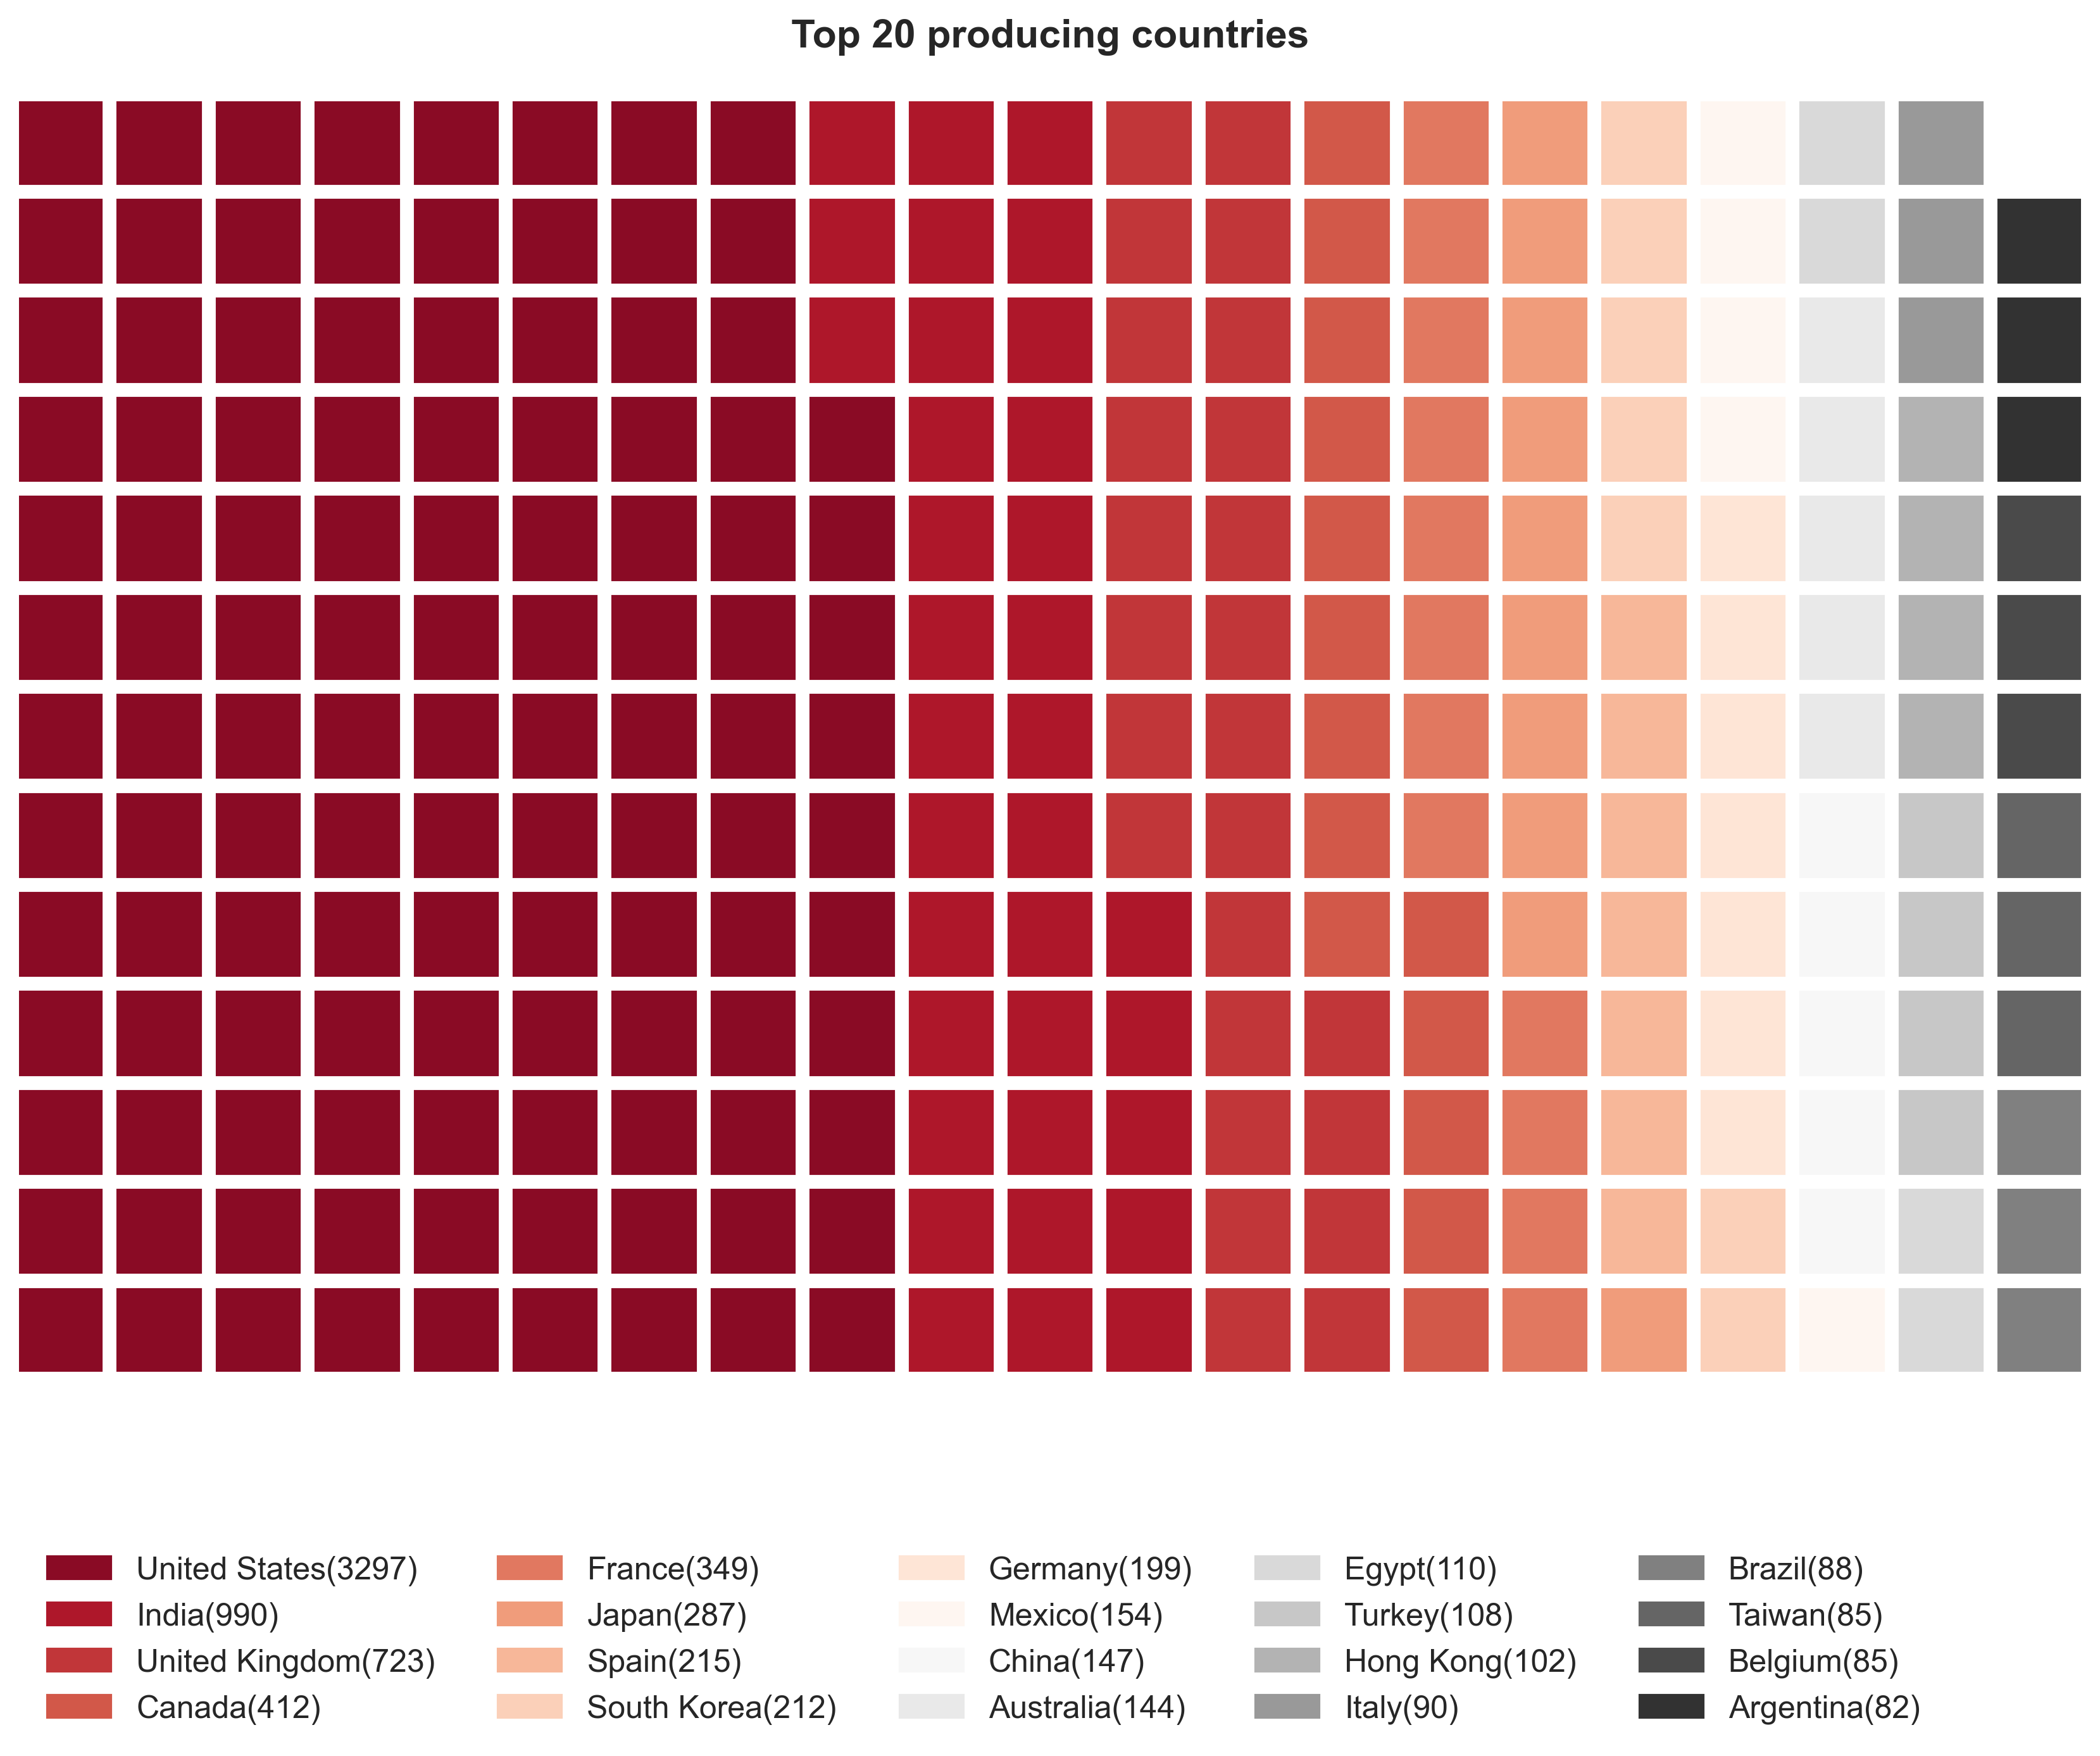

In [27]:
fig = plt.figure(FigureClass=Waffle, rows=13, columns=21, values=y, labels=["{}({})".format(a,b) for a, b in zip(y.index, y)], colors=sns.color_palette("RdGy", n_colors=20), legend={'loc' : 'lower left', 'bbox_to_anchor' : (0, -0.3), 'ncol' : len(y)//4, 'framealpha' : 0}, font_size=15, figsize=(12, 12), icon_legend=True)

plt.title('Top 20 producing countries', position=(0.5, 1.0+0.03), fontsize = 15, fontweight='bold')
plt.show()

To distinguish the colour ploting, it was 80/20 from above, but the ratio of red appears to be 90/10.

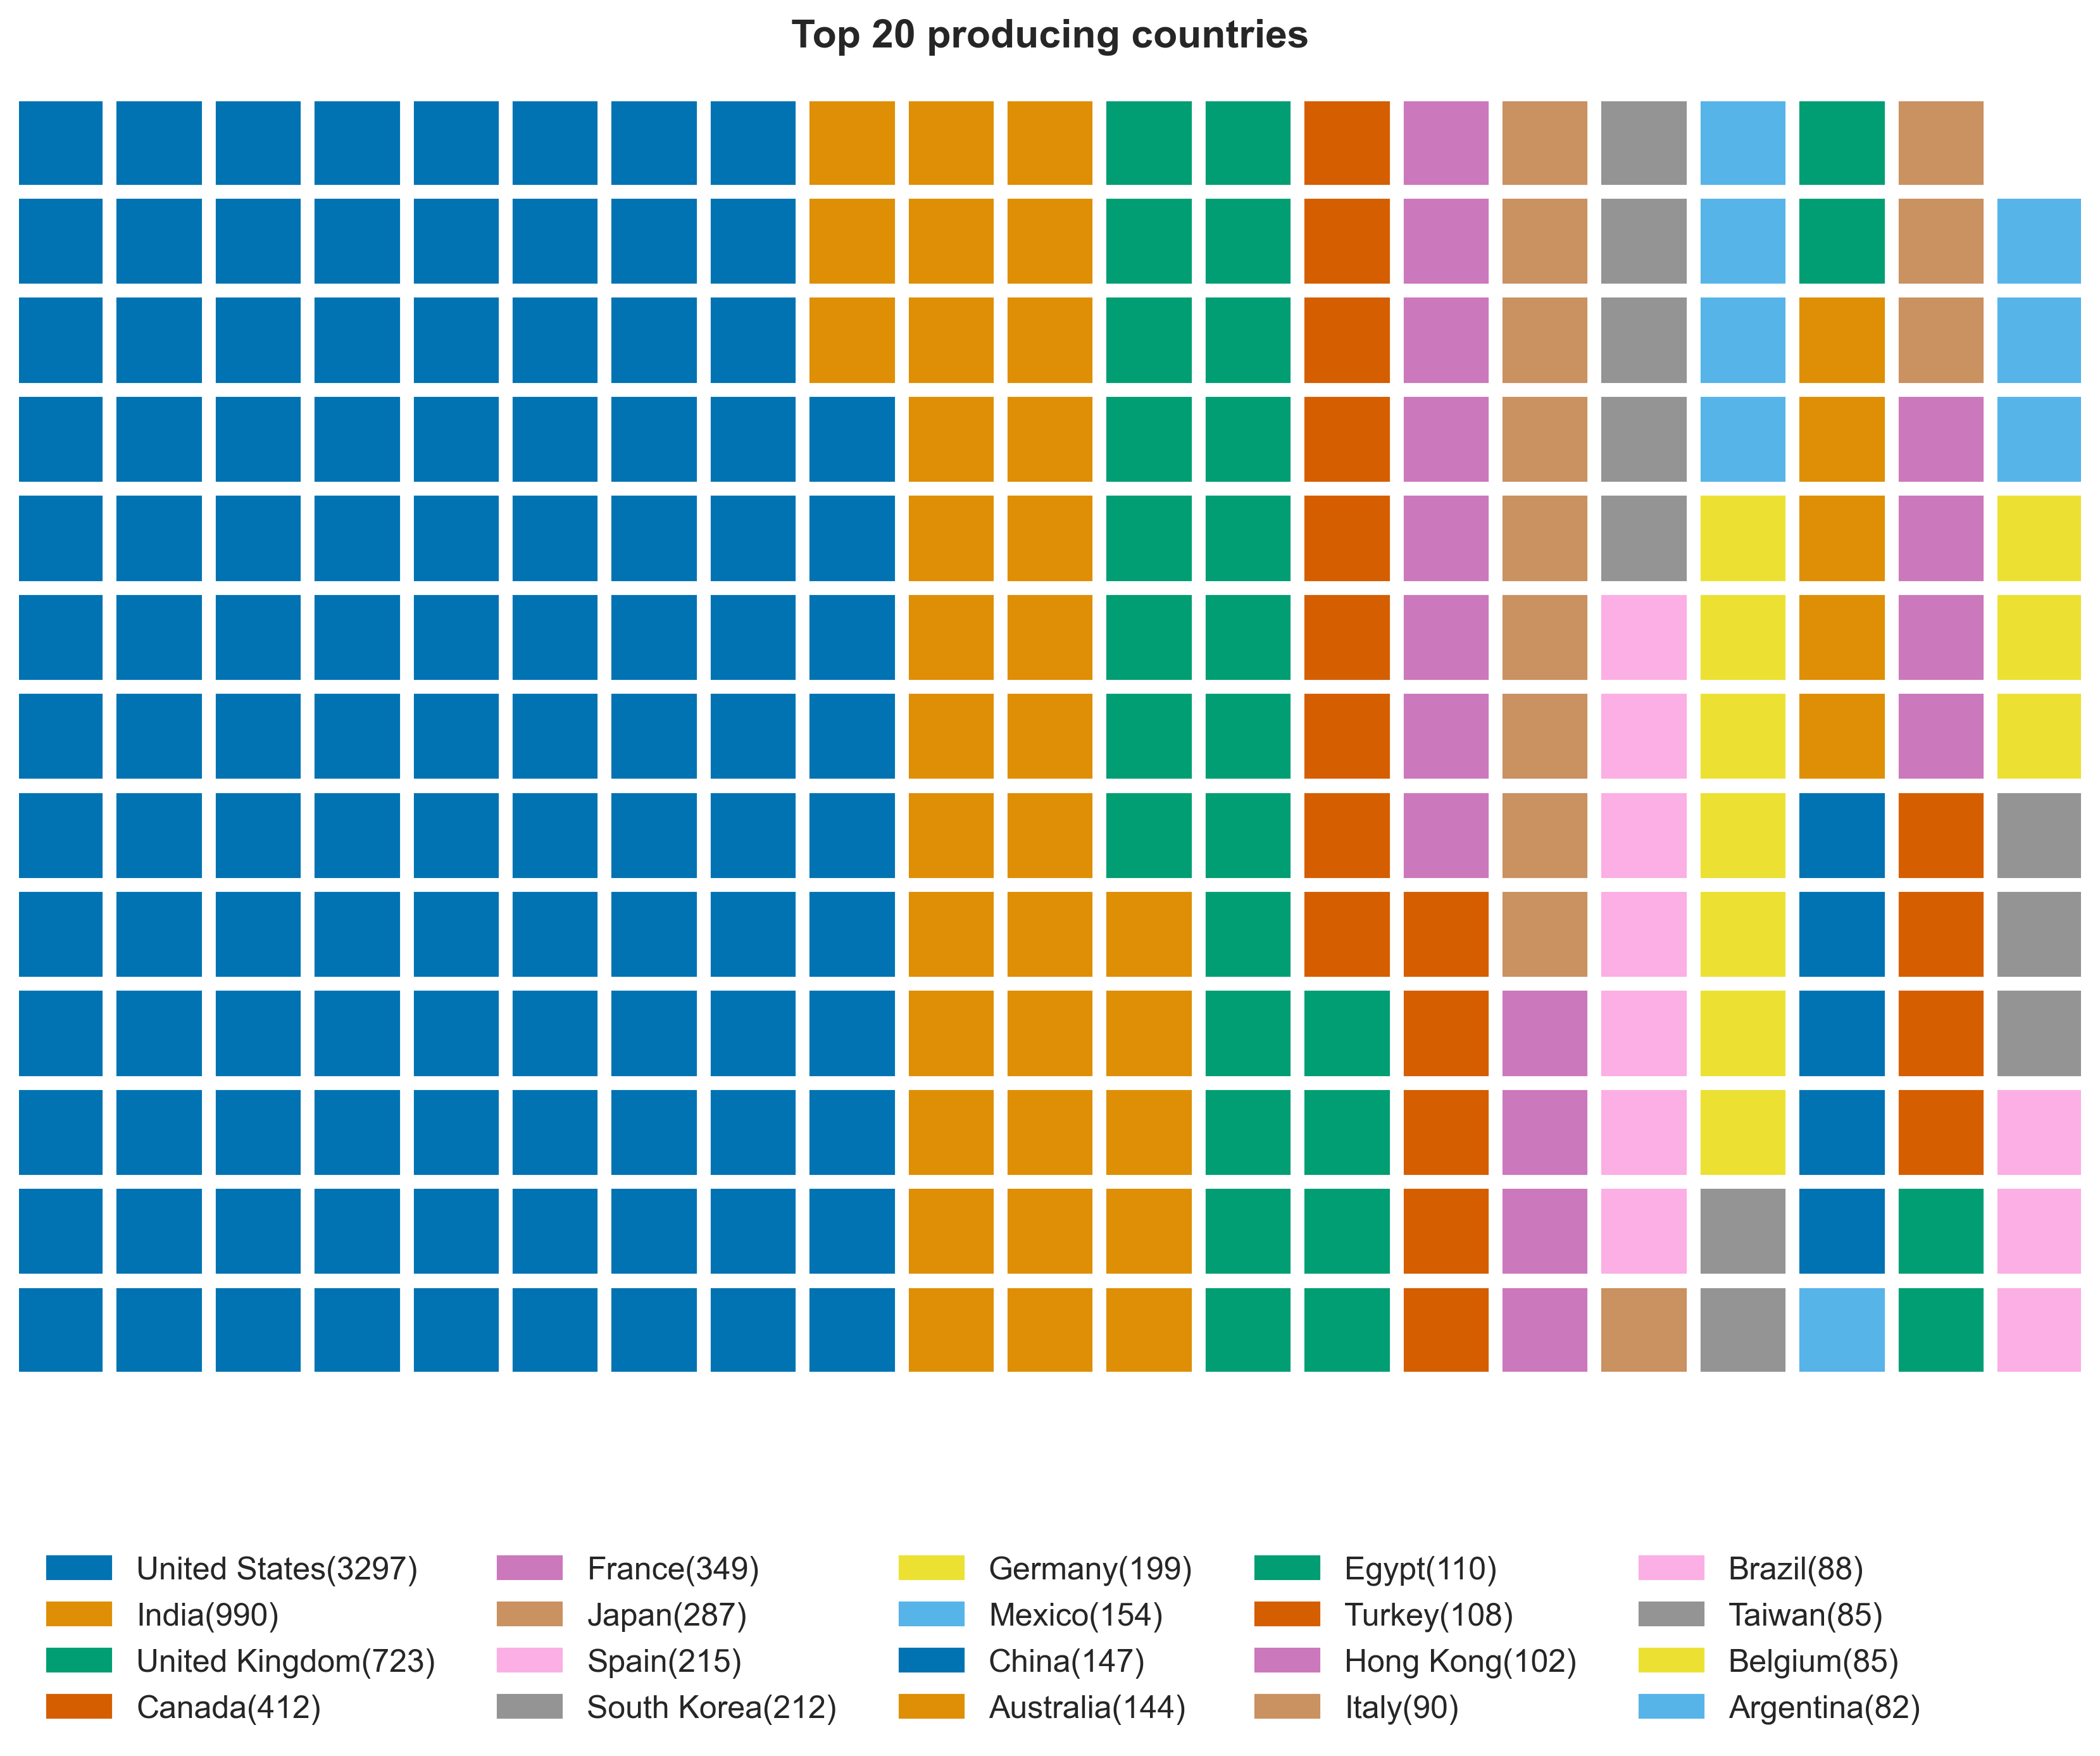

In [28]:
fig = plt.figure(FigureClass=Waffle, rows=13, columns=21, values=y, labels=["{}({})".format(a,b) for a, b in zip(y.index, y)], colors=sns.color_palette("colorblind", n_colors=20), legend={'loc' : 'lower left', 'bbox_to_anchor' : (0, -0.3), 'ncol' : len(y)//4, 'framealpha' : 0}, font_size=15, figsize=(12, 12), icon_legend=True)

plt.title('Top 20 producing countries', position=(0.5, 1.0+0.03), fontsize = 15, fontweight='bold')
plt.show()

#### Year-by-year comparisons by country

For additional interesting patterns, look at the year by country.

In [29]:
#pip install altair

In [30]:
import altair as alt
alt.renderers.enable('kaggle')

RendererRegistry.enable('kaggle')

In [31]:
#pip install vega==1.3

In [32]:
data['country'] = data['country'].dropna().apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
lst_col = 'country'
data2 = pd.DataFrame({
      col :  np.repeat(data[col].values, data[lst_col].str.len())
      for col in data.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(data[lst_col].values)})[data.columns.tolist()]

In [33]:
data2.head()

show_id     type  title           director  \
0      s1  TV Show     3%               NULL   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  
0  In a future where the elite inhabit an island ...        2020  
1  After a devastating earthquake hits Mexico Cit...        2016  
2  When an army recruit is found dead, his fellow...        2018  
3  In a postapocalyptic world, rag-doll robots hi...        2017  
4  A brilliant group of students become card-coun...        2020

In [36]:
year_country = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')
year_country['top20'] = year_country['country'].apply(lambda x : x in top20_country.index)

year_country = year_country[(year_country['year_added'] >= 1990) & year_country['top20'] & (year_country['year_added'] < 2020)]
alt.Chart(year_country).mark_area().encode(alt.X('year_added'), alt.Y('counts:Q', stack='center', axis=None), alt.Color('country:N', scale=alt.Scale(scheme='redgrey'), sort=list(top20_country.index)), ).properties(height=350, width=600)

alt.Chart(...)

The streamgraph is the name given to this graph. It has the advantage of being able to convey the overall distribution, but it does not allow for specific comparisons.
The years 2015 and 2016 have the maximum frequency for accurate comparisons, as shown in this graph. Let's do a percentage comparison and see how it looks.

In [38]:
alt.Chart(year_country).mark_area().encode(alt.X('year_added'), alt.Y('counts:Q', stack='normalize', axis=None), alt.Color('country:N', scale=alt.Scale(scheme='redgrey'), sort=list(top20_country.index)), ).properties(height=350, width=600)

alt.Chart(...)

The red ones, i.e. the United States, India, and the United Kingdom, have the highest percentage of content, as can be seen in the graph. Now, I'm using the time element to represent it on the map.

In [40]:
import plotly.express as px
year_country2 = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country2, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )
fig.update_layout(title='Comparision by Country')
fig.show()

We can observe from the graph that the export is increasing over time.

#### Movies and television shows (Genre)

determining the relationship between each genre by film and television show category

In [45]:
from sklearn.preprocessing import MultiLabelBinarizer

def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x : x.replace(' ,',',').replace(', ',',').split(','))
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
        
    plt.show()

#### Movie Genre Relation 

There are 20 types in the Netflix Movie Dataset


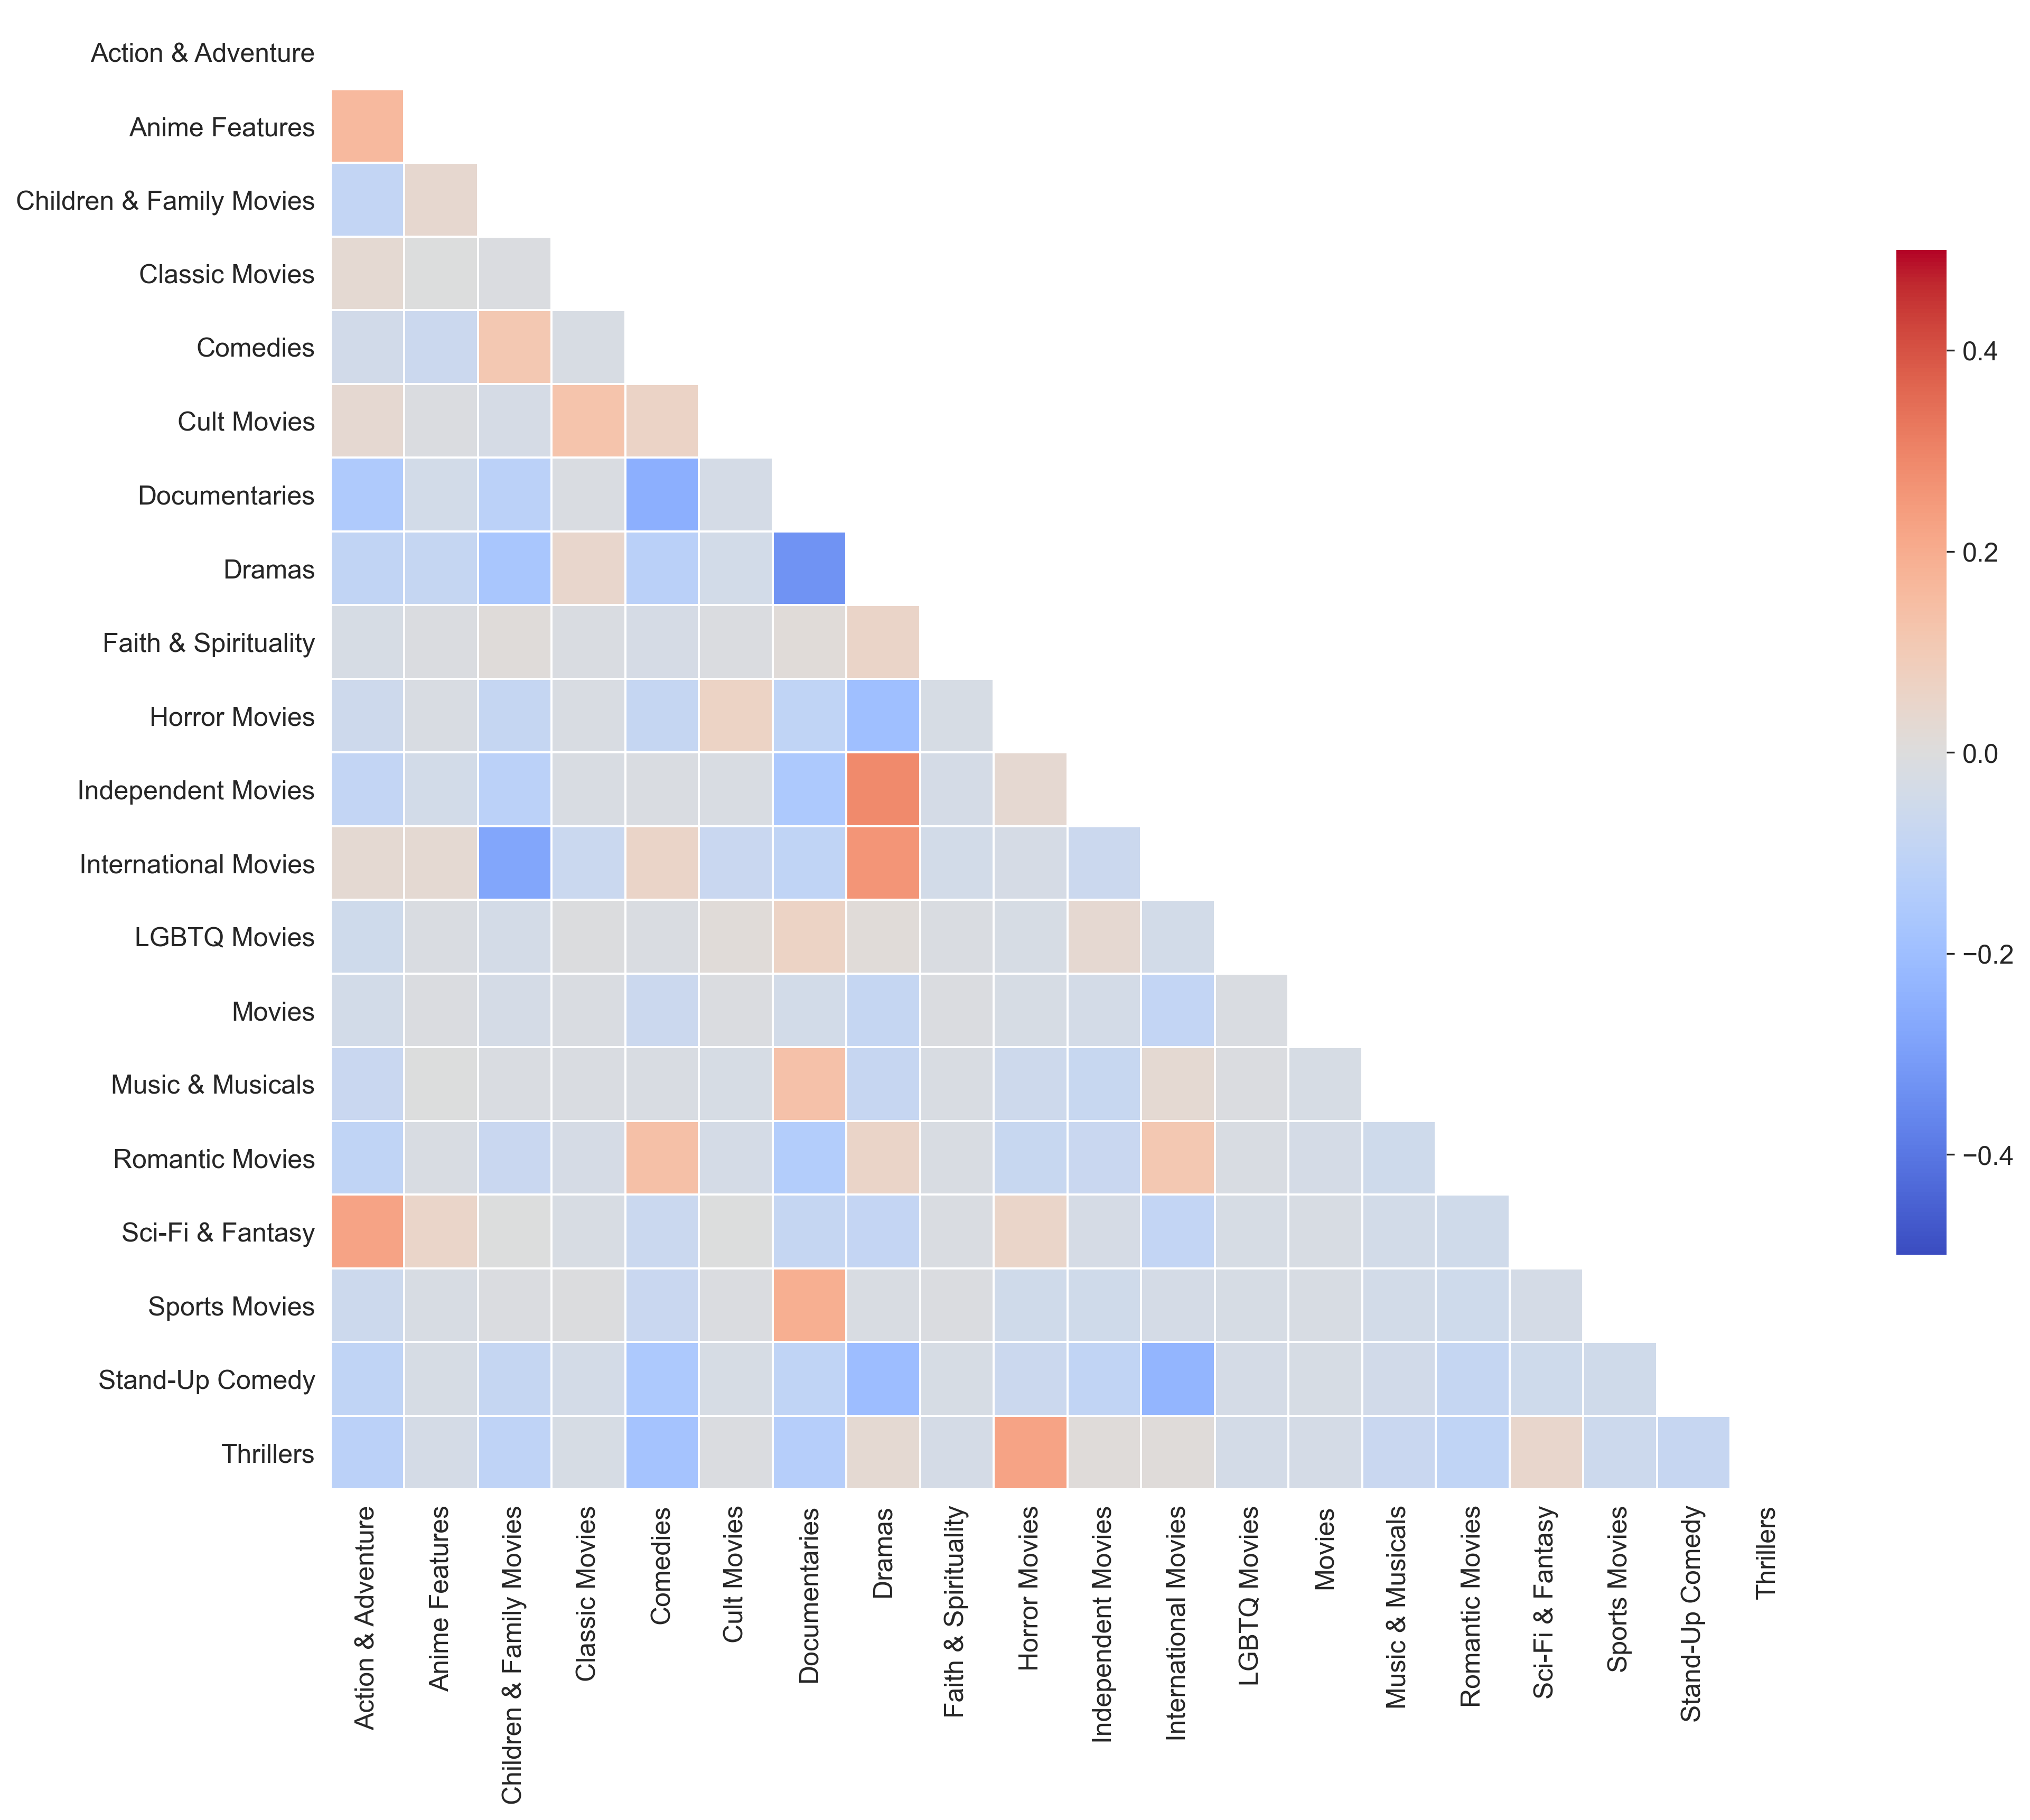

In [46]:
relation_heatmap(movie, 'Movie')

The unfavourable relationship between dramas and documentaries in movies is striking. There are also numerous dramas for independent and international films.

#### Relationship of TV Show Genres

There are 22 types in the Netflix TV Show Dataset


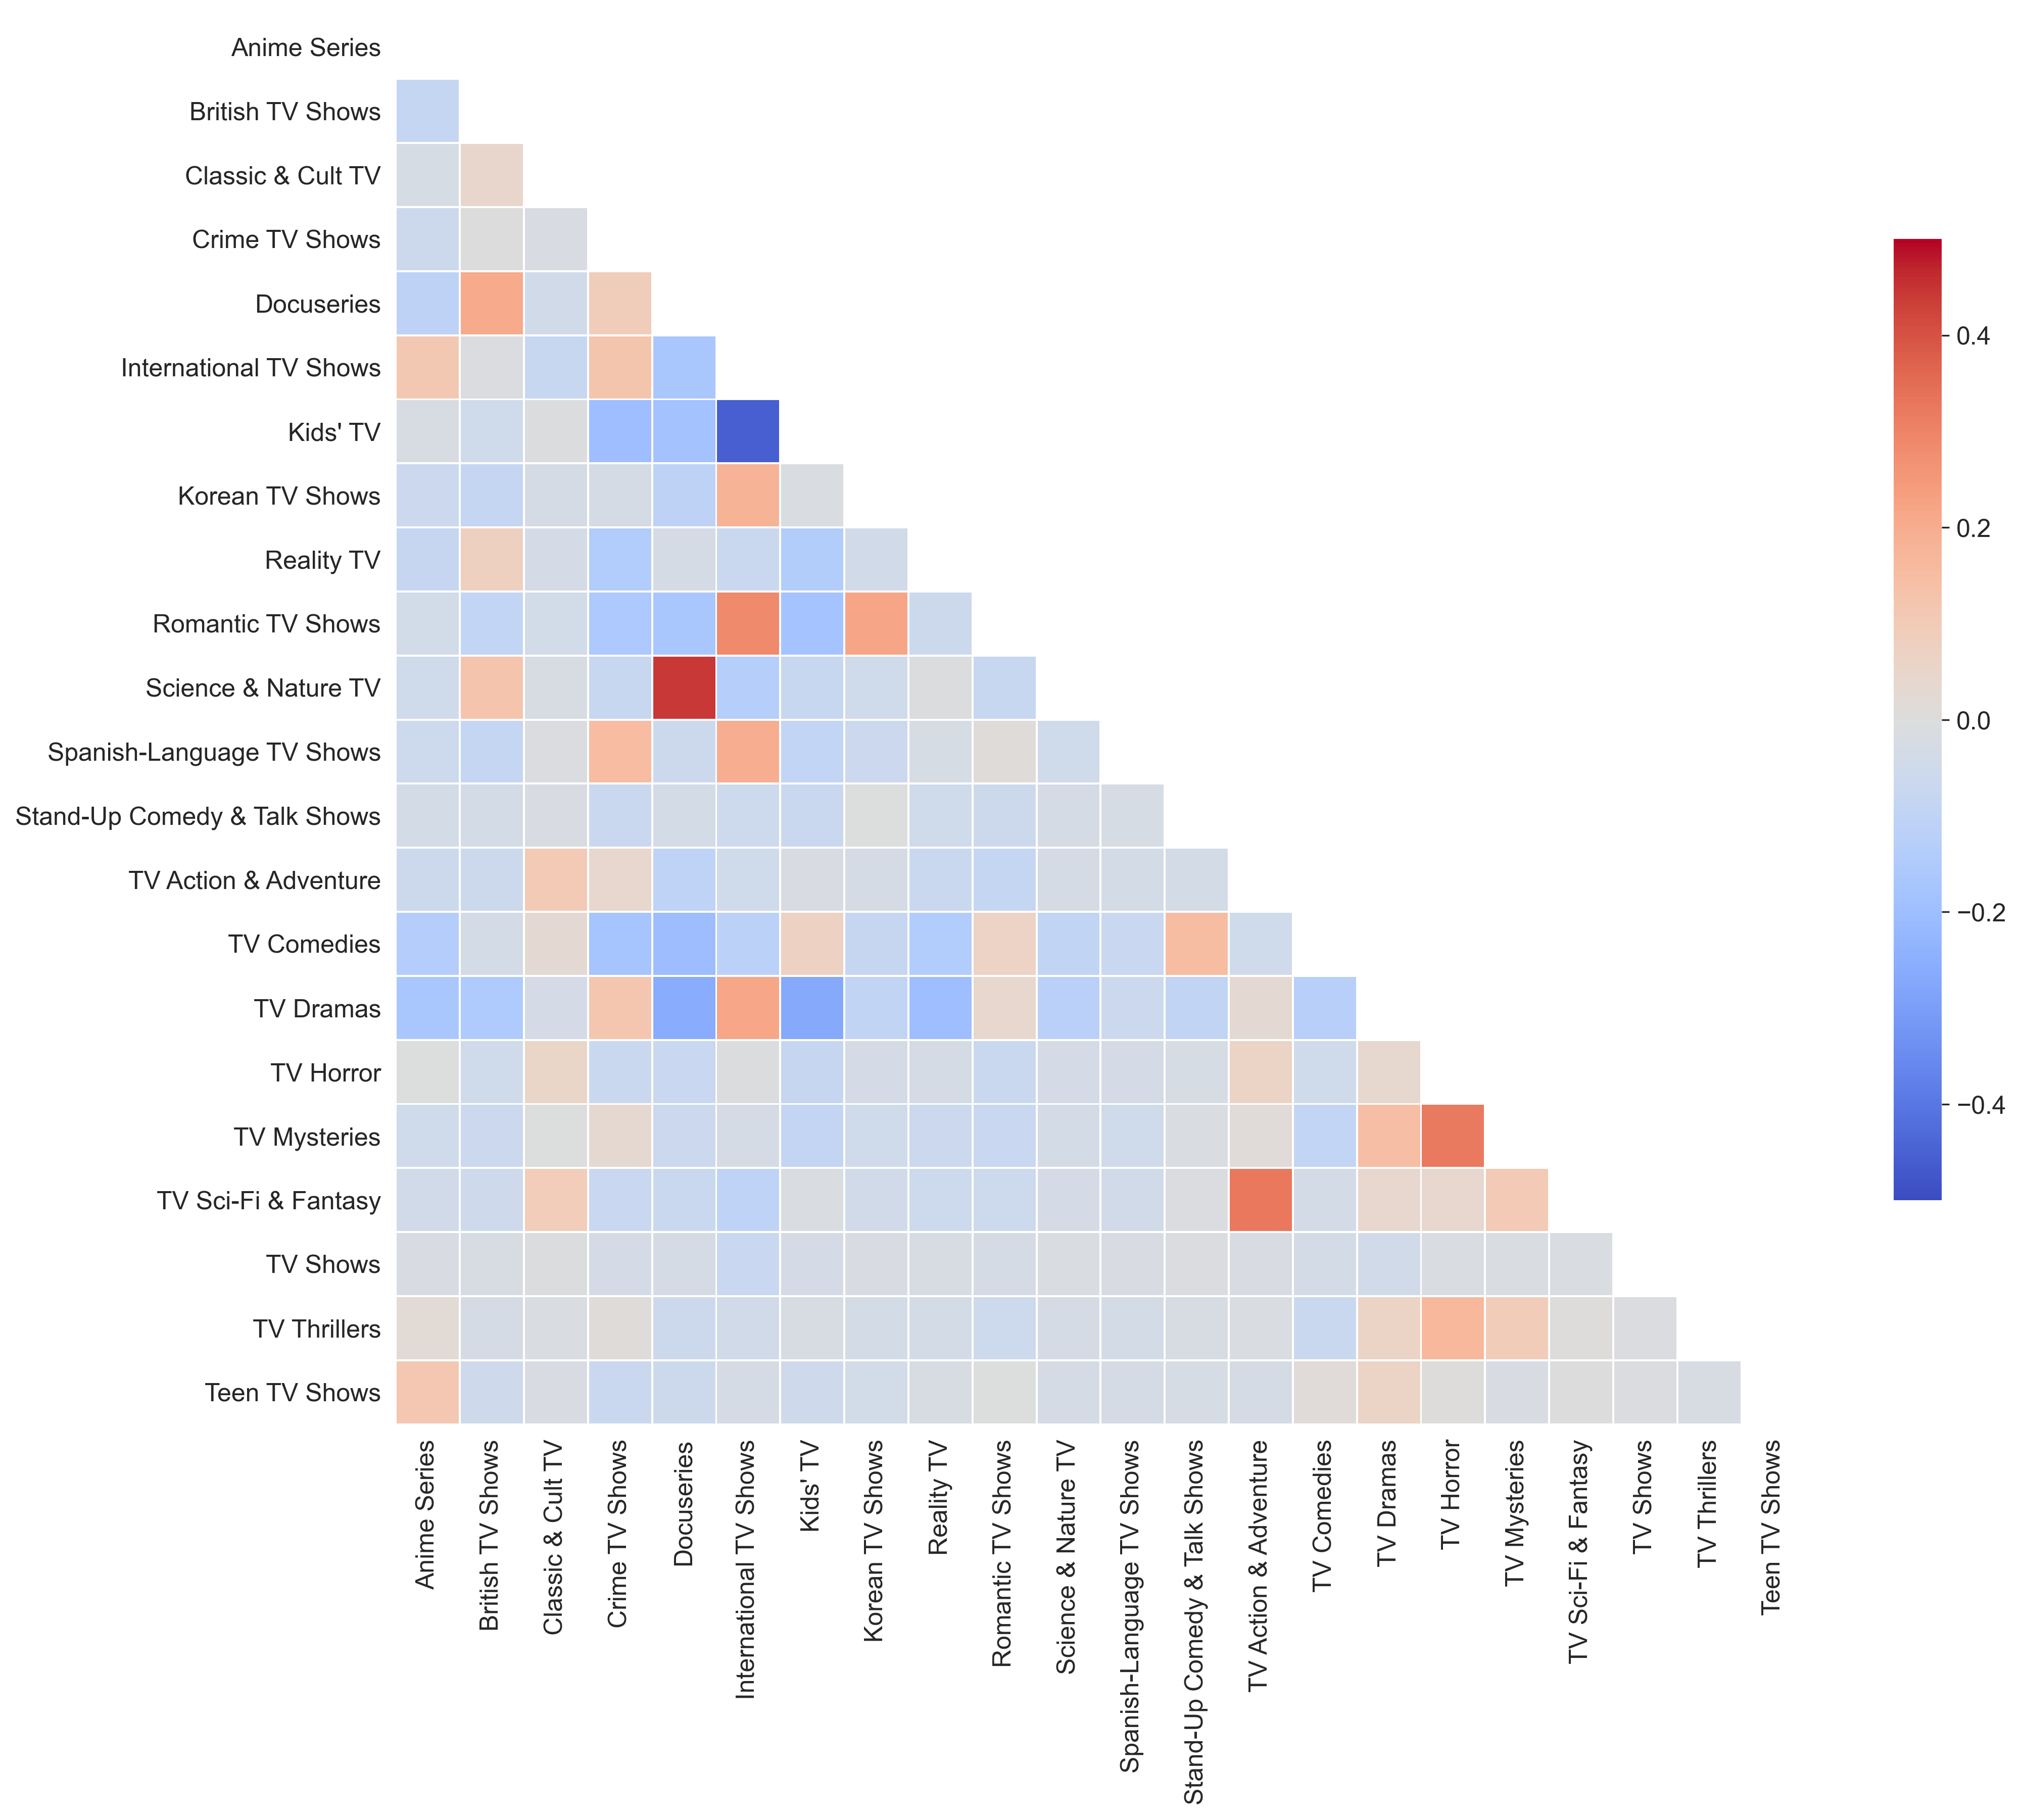

In [47]:
relation_heatmap(tv_show, 'TV Show')

Movies and television shows are more closely linked.

TThe most obvious is the link between children and international (could it be because children's programming is vital to their culture? ), science and natural history, and docuseries.

#### Rating Distribution

Netflix assigns a maturity rating to each TV show and movie to help users make informed decisions for themselves and their children. Netflix or a local standards authority determines the maturity ratings. The frequency and impact of mature content in a TV show or movie are used by Netflix to calculate maturity ratings. The general maturity level of a television series is reflected in its ratings.

## Rating System

G	General Audiences
PG	Parental Guidance Suggested
PG-13	Parents Stongly Cautioned
R	Restricted
NC-17	Adults Only

In [2]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

movie_rating = movie['rating'].value_counts()[rating_order]
tv_rating = tv_show['rating'].value_counts()[rating_order].fillna(0)

NameError: name 'movie' is not defined

In [50]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

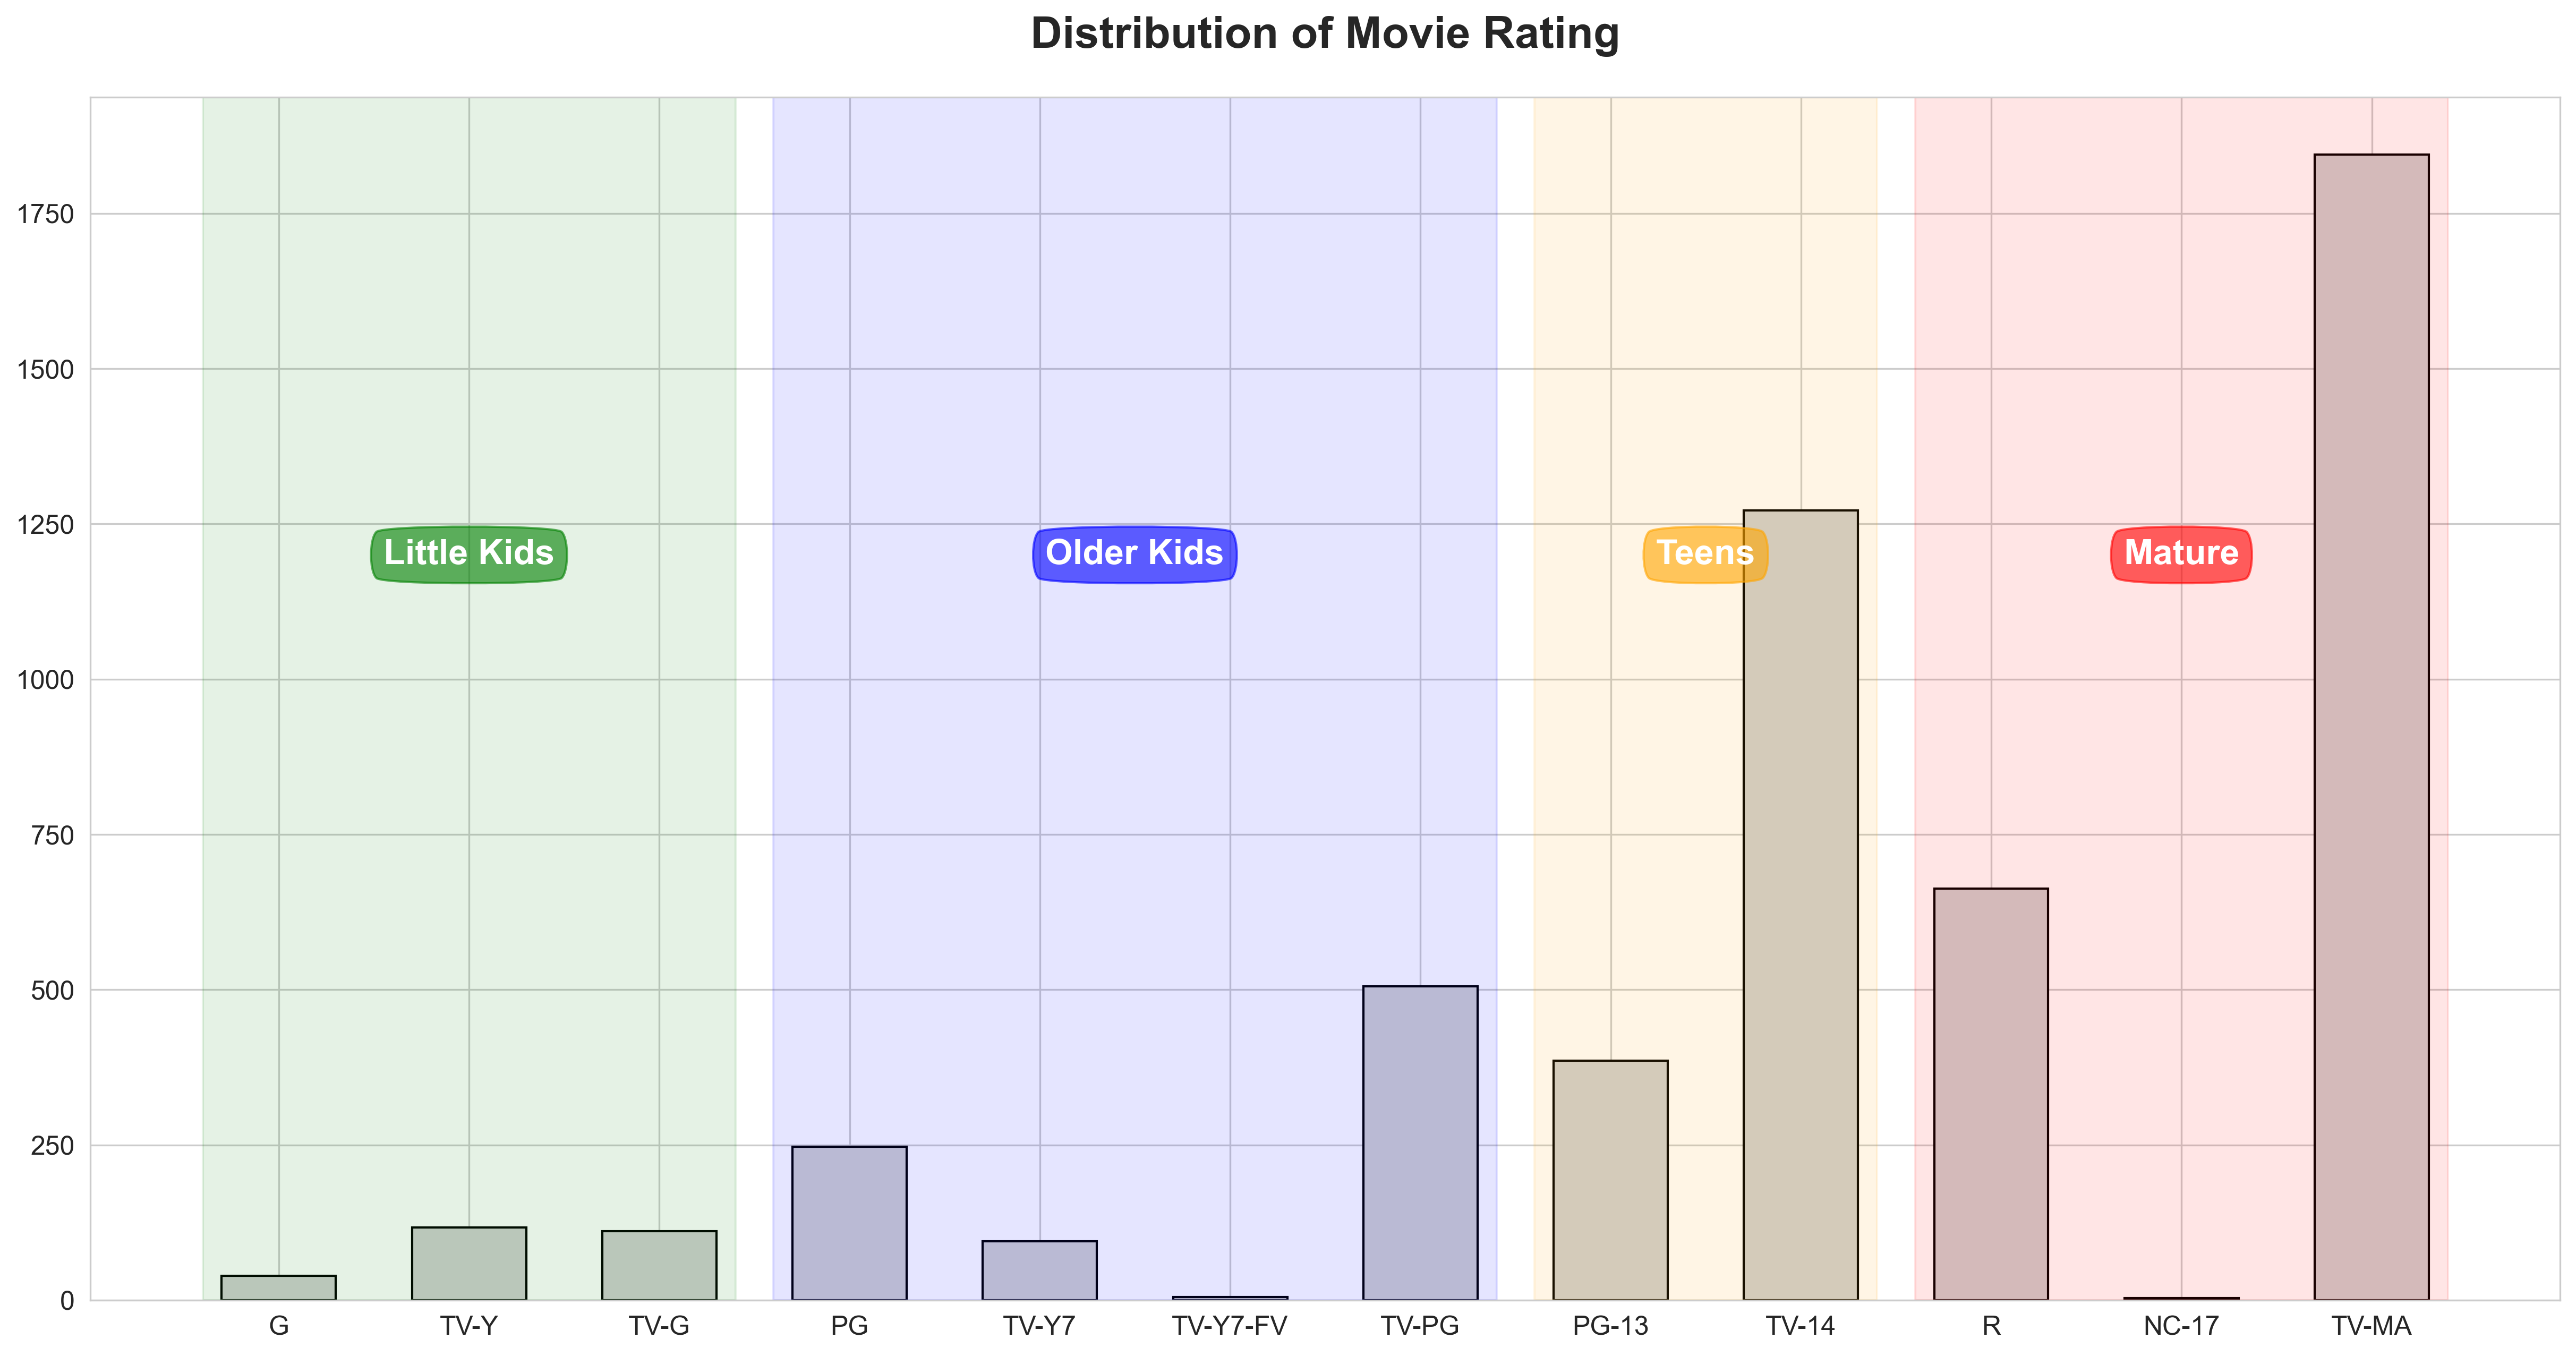

In [51]:
rating_barplot(movie_rating,'Movie', 1200)

In [63]:
#rating_barplot(tv_rating,'TV Show' , 700, 800)   #this is not working

Obviously, the TV Show is geared toward younger children. Perhaps much more so now that Netflix is available on home televisions.

Let's have a look at the ratio on a comparable scale.

In [58]:
rating_data = data[['rating', 'type']].groupby('type')['rating'].value_counts().unstack().fillna(0)[rating_order].T
rating_data = pd.DataFrame(pd.concat([rating_data['Movie'], rating_data['TV Show']])).reset_index().rename(columns={'rating':'rating',0:'cnt'})
rating_data['type'] = rating_data.index//12

In [59]:
data['tmp'] = 1
base = alt.Chart(rating_data).transform_calculate(
    type=alt.expr.if_(alt.datum.type == 0, 'Movie', 'TV Show')
).properties(
    height=300,
    width=300
)


color_scale = alt.Scale(domain=['Movie', 'TV Show'], range=['skyblue', 'salmon'])

left = base.transform_filter(
    alt.datum.type == 'Movie'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q',
            title='population',
            sort=alt.SortOrder('descending')),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Movie')

middle = base.encode(
    y=alt.Y('rating', axis=None, sort=rating_order),
    text=alt.Text('rating'),
).mark_text().properties(width=30)

right = base.transform_filter(
    alt.datum.type == 'TV Show'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q', title='population'),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='TV Show')

alt.concat(left, middle, right, spacing=5)

alt.ConcatChart(...)

#### What is the relationship between the months?

It appears to rise at the end of each month, but it continues to rise, resulting in the following picture:

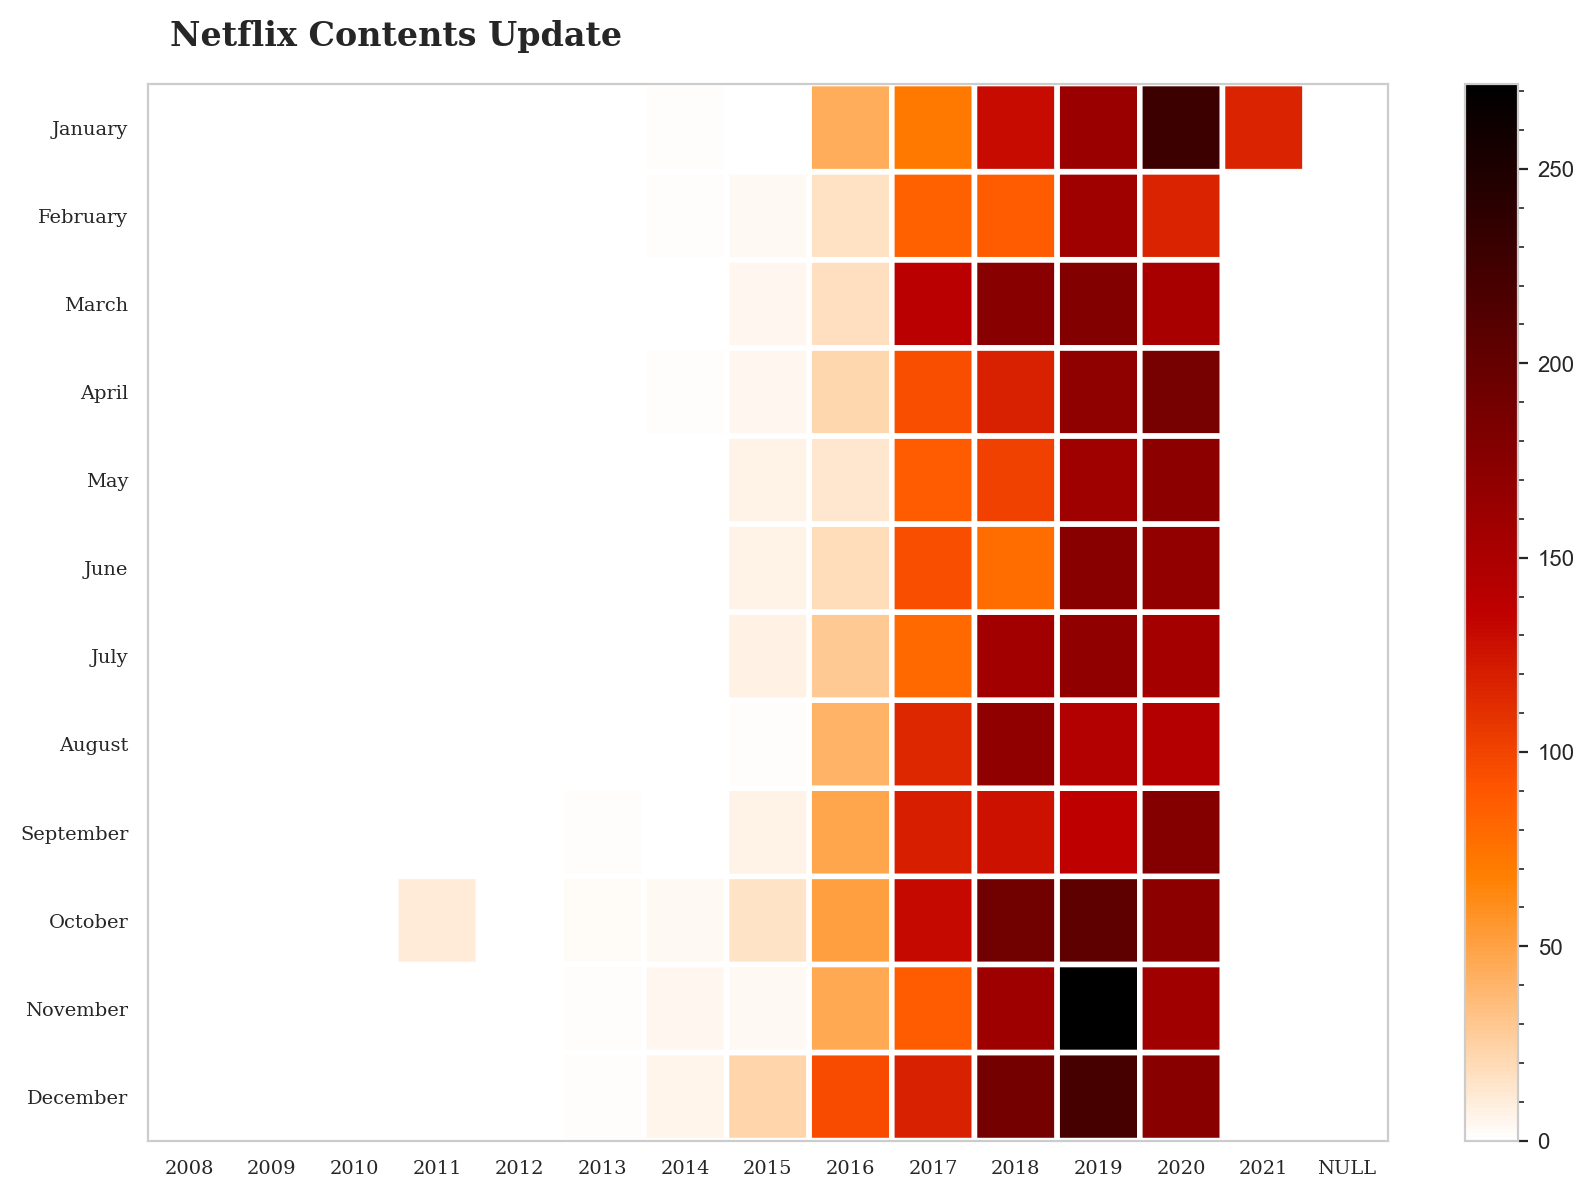

In [60]:
netflix_date = data[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

A basic linear graph might work well in this incremental set.